In [134]:
import pandas as pd 
df = pd.read_csv("data_without_price_outliers.csv")
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,90210,10100 Angelo Cir,SINGLE_FAMILY,2009,1041.815612,596.901775,5,7.0,1.0,['Tile'],...,1,1,1,0,0,1,3.017791,2.775903,4.556303,6.839742
1,90044,948 W 61st St,MULTI_FAMILY,2008,483.281406,78.410132,2,1.0,1.0,[],...,0,0,0,0,0,0,2.684200,1.894372,4.648360,5.958711
2,91352,10159 Colwell Dr,SINGLE_FAMILY,1943,535.957407,107.210062,3,1.0,1.0,"['Carpet', 'Vinyl', 'Wood']",...,0,1,0,0,0,1,2.729130,2.030236,5.093422,5.856789
3,91605,8250 Lankershim Blvd,MANUFACTURED,1990,111.483600,69.677250,2,2.0,1.0,['Laminate'],...,1,1,0,0,1,1,2.047211,1.843091,5.130334,4.251881
4,91304,8811 Canoga Ave SPACE 535,MANUFACTURED,1971,82058.180220,124.861632,2,2.0,1.0,[],...,1,1,0,0,0,1,4.914122,2.096429,4.929419,5.641439


In [135]:
df.describe()

,zipcode,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,fireplaceFeatures,taxAssessedValue,zestimate,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
count,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4.735000e+03,4.735000e+03,...,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000
mean,90668.165998,1961.499894,2871.939986,186.919456,3.378458,2.809345,1.317423,0.544456,7.851525e+05,1.434810e+06,...,0.805913,0.885533,0.561985,0.109820,0.115100,0.844562,3.032504,2.206296,6.046425,5.681535
std,648.482534,29.535432,6969.945597,125.664397,2.147488,1.985461,0.584245,0.498072,1.080504e+06,1.427162e+06,...,0.395538,0.318411,0.496195,0.312699,0.319177,0.362360,0.490648,0.225559,0.273690,0.442529
min,90001.000000,1885.000000,72.371437,16.722540,0.000000,0.000000,0.000000,0.000000,9.010000e+03,3.700000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.859567,1.223302,4.556303,3.954725
25%,90041.500000,1941.000000,555.430805,114.828108,2.000000,2.000000,1.000000,0.000000,2.612390e+05,7.557000e+05,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.744630,2.060048,5.866287,5.417038
50%,90291.000000,1957.000000,701.046038,152.546726,3.000000,2.000000,1.000000,1.000000,5.307740e+05,1.030800e+06,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.845747,2.183403,6.000000,5.724910
75%,91342.000000,1980.000000,1557.892455,213.444642,4.000000,3.000000,2.000000,1.000000,9.066600e+05,1.603150e+06,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.192537,2.329285,6.197281,5.957444
max,91607.000000,2024.000000,82058.180220,1246.944066,72.000000,38.000000,6.000000,1.000000,2.264544e+07,2.351180e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.914122,3.095847,7.374748,7.354981


In this analysis, we imported `pandas`, `seaborn`, and `matplotlib.pyplot` to handle data manipulation and visualization. We selected key property features from our dataframe and filtered out only the numeric columns. By calculating the correlation matrix for these numeric features, we created a heatmap to visualize the relationships between them. This heatmap, annotated with correlation coefficients, helps us intuitively identify how different property attributes are related, whether positively or negatively. 

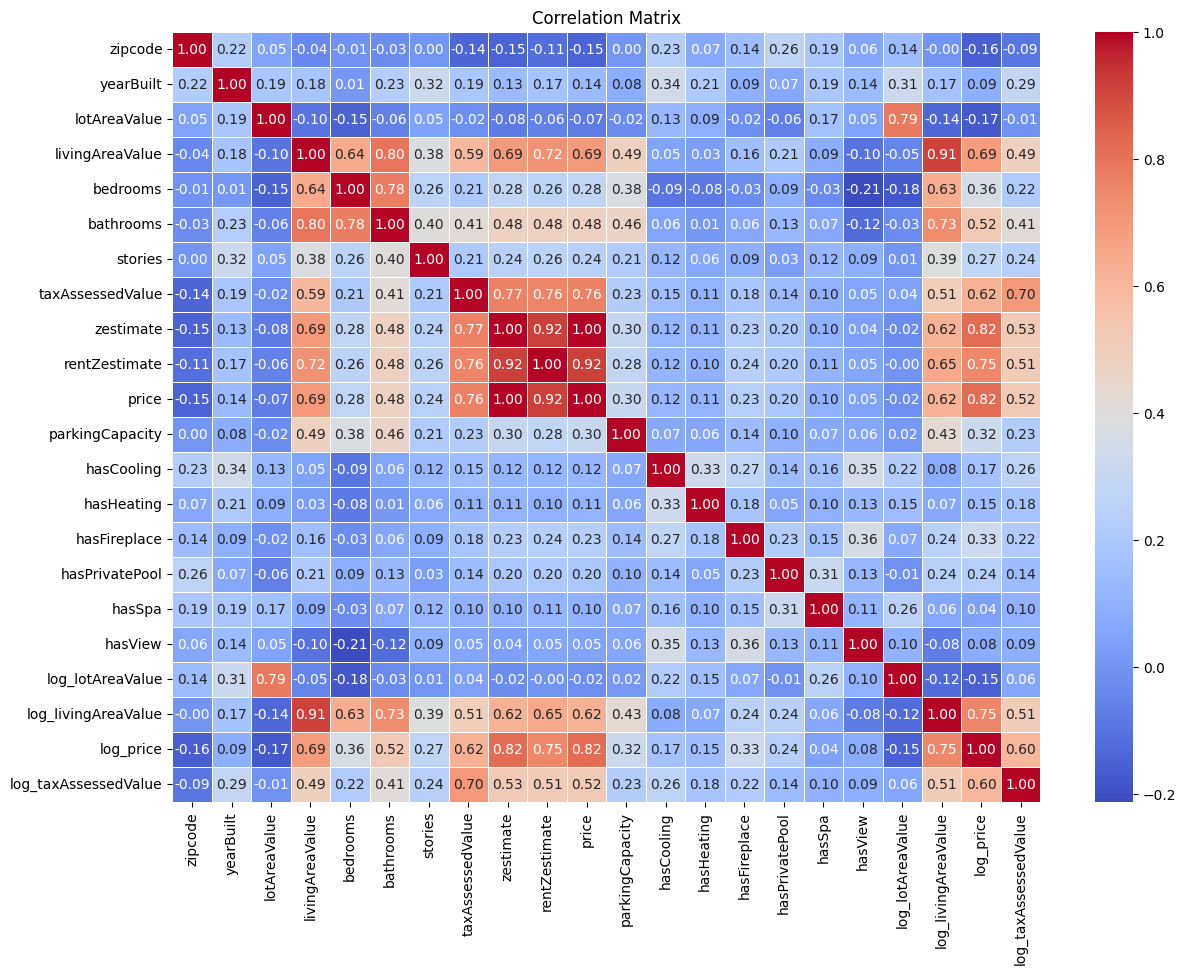

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
features = [
    'zipcode', 'yearBuilt', 'lotAreaValue', 'livingAreaValue', 'bedrooms',
    'bathrooms', 'stories', 'taxAssessedValue', 'zestimate', 'rentZestimate',
    'price', 'parkingCapacity', 'hasCooling', 'hasHeating', 'hasFireplace',
    'hasPrivatePool', 'hasSpa', 'hasView', 'log_lotAreaValue', 'log_livingAreaValue',
    'log_price', 'log_taxAssessedValue'
]

filtered_df = df[features]
numeric_features_df = filtered_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In this part of our analysis, we set a correlation threshold of 0.6 and iterated through the columns of our correlation matrix to identify pairs of features with a high correlation. For each pair of features, if their absolute correlation coefficient exceeded the threshold, we printed their names along with the corresponding correlation value. 

In [137]:
threshold = 0.6
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

lotAreaValue and log_lotAreaValue: 0.79
livingAreaValue and bedrooms: 0.64
livingAreaValue and bathrooms: 0.80
livingAreaValue and zestimate: 0.69
livingAreaValue and rentZestimate: 0.72
livingAreaValue and price: 0.69
livingAreaValue and log_livingAreaValue: 0.91
livingAreaValue and log_price: 0.69
bedrooms and bathrooms: 0.78
bedrooms and log_livingAreaValue: 0.63
bathrooms and log_livingAreaValue: 0.73
taxAssessedValue and zestimate: 0.77
taxAssessedValue and rentZestimate: 0.76
taxAssessedValue and price: 0.76
taxAssessedValue and log_price: 0.62
taxAssessedValue and log_taxAssessedValue: 0.70
zestimate and rentZestimate: 0.92
zestimate and price: 1.00
zestimate and log_livingAreaValue: 0.62
zestimate and log_price: 0.82
rentZestimate and price: 0.92
rentZestimate and log_livingAreaValue: 0.65
rentZestimate and log_price: 0.75
price and log_livingAreaValue: 0.62
price and log_price: 0.82
log_livingAreaValue and log_price: 0.75


The correlation analysis above reveals significant relationships among property features, indicating that as the living area increases, the number of bedrooms and bathrooms, as well as market valuations like zestimate, rent estimate, and price, also tend to increase. The log-transformed features (`log_lotAreaValue`, `log_livingAreaValue`, `log_price`, `log_taxAssessedValue`) maintain high correlations with their original counterparts, confirming the effectiveness of log transformations. Key insights include strong correlations between `taxAssessedValue` and various market estimates, and perfect correlation between `zestimate` and `price`, highlighting potential multicollinearity and redundancy among these features.

In [138]:
df = df[df['homeType'] != 'MANUFACTURED']
df = df[df['homeType'] != 'LOT']

**MOST COMMON TYPE OF COOLING**

In [139]:
df['cooling'] = df['cooling'].apply(lambda x: eval(x) if x != '[]' else [])
df = df[df['cooling'].astype(bool)]
df['cooling'] = df['cooling'].apply(lambda x: [item.lower().strip("' ") for item in x])

df = df.explode('cooling')
cooling_counts = df['cooling'].value_counts()

most_used_cooling = cooling_counts.idxmax()

print("The most used type of cooling is:", most_used_cooling)


The most used type of cooling is: central


**MOST COMMON TYPE OF HEATING**

In [140]:
df['heating'] = df['heating'].apply(lambda x: eval(x) if x != '[]' else [])

df = df[df['heating'].astype(bool)]
df['heating'] = df['heating'].apply(lambda x: [item.lower().strip("' ") for item in x])

df = df.explode('heating')
heating_counts = df['heating'].value_counts()
most_used_heating = heating_counts.idxmax()

print("The most used type of heating is:", most_used_heating)

The most used type of heating is: central


**MOST COMMON TYPE OF FLOORING**

In [141]:
df['flooring'] = df['flooring'].apply(lambda x: eval(x) if x != '[]' else [])

df = df[df['flooring'].astype(bool)]
df['flooring'] = df['flooring'].apply(lambda x: [item.lower().strip("' ") for item in x])
df = df.explode('flooring')

flooring_counts = df['flooring'].value_counts()
most_used_flooring = flooring_counts.idxmax()

print("The most used type of flooring is:", most_used_flooring)

The most used type of flooring is: wood


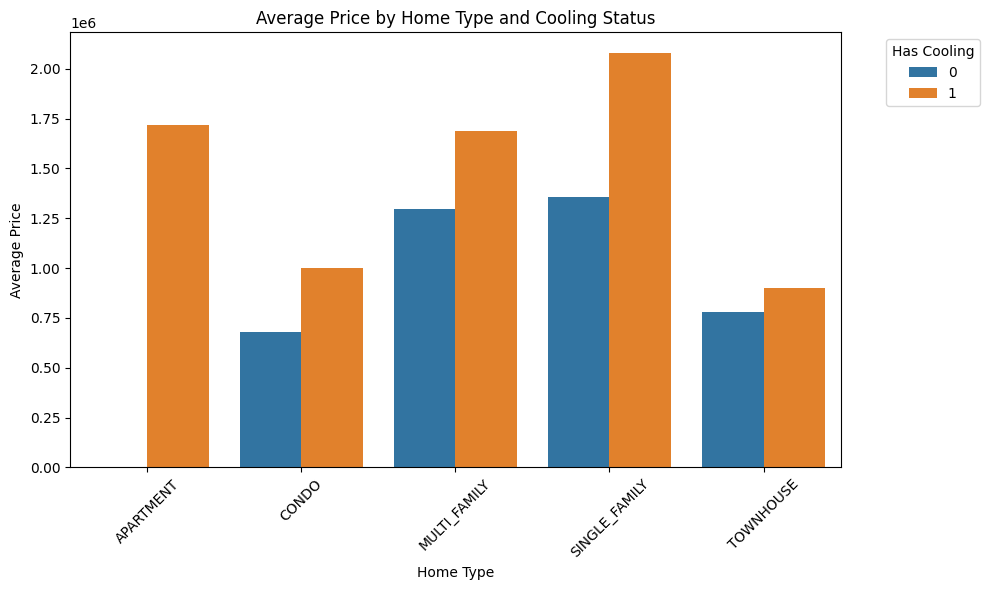

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
grouped_data = df.groupby(['homeType', 'hasCooling'])['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='homeType', y='price', hue='hasCooling', data=grouped_data)
plt.title('Average Price by Home Type and Cooling Status')
plt.xlabel('Home Type')
plt.ylabel('Average Price')
plt.legend(title='Has Cooling', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Single Family Homes, Condos, and Apartments:
1. **Comfort and Modernity**:
   - Cooling systems provide comfort, particularly in warmer climates, and are considered a modern convenience.
   
2. **Higher Living Standards**:
   - The presence of cooling indicates a higher standard of living and is often expected in higher-priced properties. Homes with cooling are more attractive to buyers who prioritize comfort and modern amenities.

#### Townhouses:
1. **Historical and Design Factors**:
   - Some townhouses, especially older ones, might not have central cooling due to historical design constraints.
   
2. **Market Segment**:
   - The buyers of townhouses might prioritize other features like location and space over cooling, particularly in regions with milder climates where cooling is not as essential.

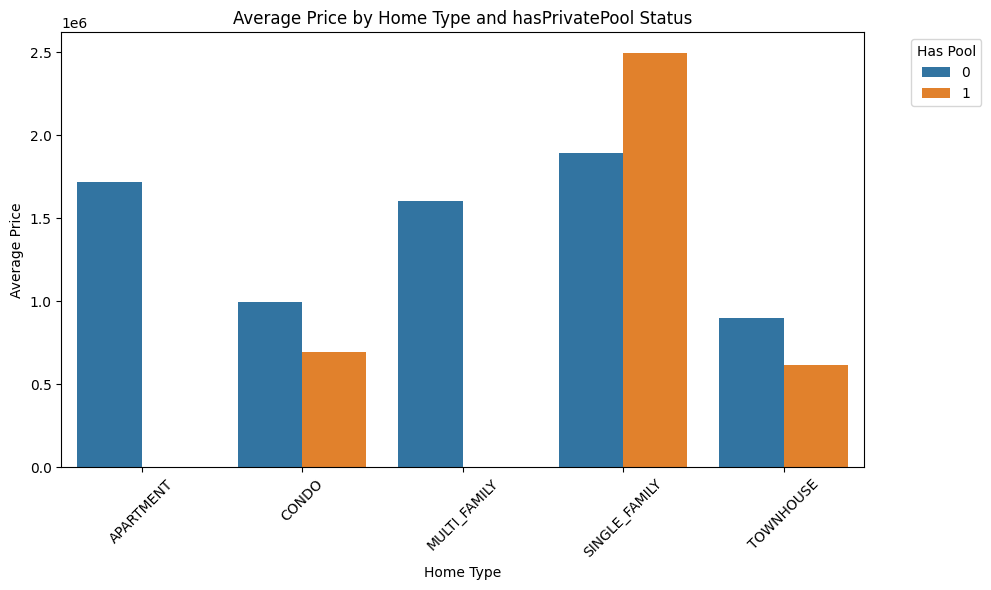

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['homeType', 'hasPrivatePool'])['price'].mean().reset_index()

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='homeType', y='price', hue='hasPrivatePool', data=grouped_data)
plt.title('Average Price by Home Type and hasPrivatePool Status')
plt.xlabel('Home Type')
plt.ylabel('Average Price')
plt.legend(title='Has Pool', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Single Family Homes:
1. **Lifestyle and Luxury**:
   - A private pool in a single-family home is often associated with a luxurious lifestyle and adds significant value to the property. It offers privacy and exclusivity, making it an attractive feature for affluent buyers.

2. **Outdoor Living Space**:
   - Single-family homes typically have more outdoor space, allowing for the addition of amenities like private pools. This enhances the property's appeal and can justify a higher price.

#### Condos, Townhouses, and Apartments:
1. **Shared Amenities**:
   - These types of properties often offer shared amenities such as community pools, gyms, and recreational areas. Buyers may prefer the convenience of shared facilities over the maintenance and costs associated with a private pool.

2. **Space Constraints**:
   - Condos, townhouses, and apartments typically have limited outdoor space compared to single-family homes. As a result, the addition of a private pool may not be feasible or desirable for all buyers.

3. **Market Preferences**:
   - Buyers of condos, townhouses, and apartments may prioritize other features such as location, affordability, and maintenance-free living over having a private pool. In some cases, not having a pool may be preferred, especially if it means lower homeowner association fees or less maintenance responsibilities.

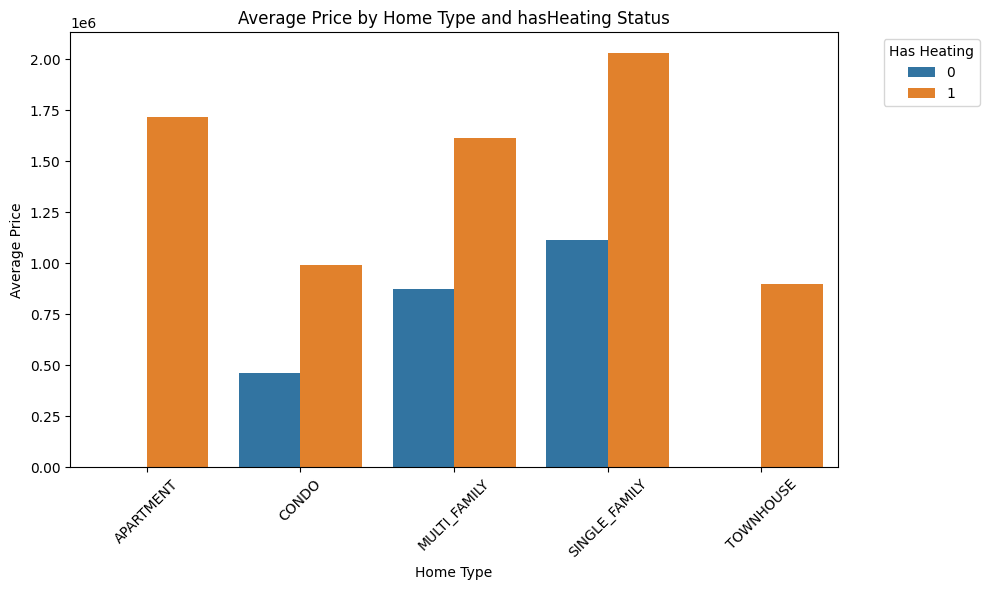

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['homeType', 'hasHeating'])['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='homeType', y='price', hue='hasHeating', data=grouped_data)
plt.title('Average Price by Home Type and hasHeating Status')
plt.xlabel('Home Type')
plt.ylabel('Average Price')
plt.legend(title='Has Heating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In regions like Los Angeles with milder climates, the presence of heating remains a significant factor in determining home prices for both single-family homes and other residential properties. While heating may not be used as frequently as in colder climates, it still enhances comfort, meets market expectations, and ensures regulatory compliance, contributing to the overall value of the property.

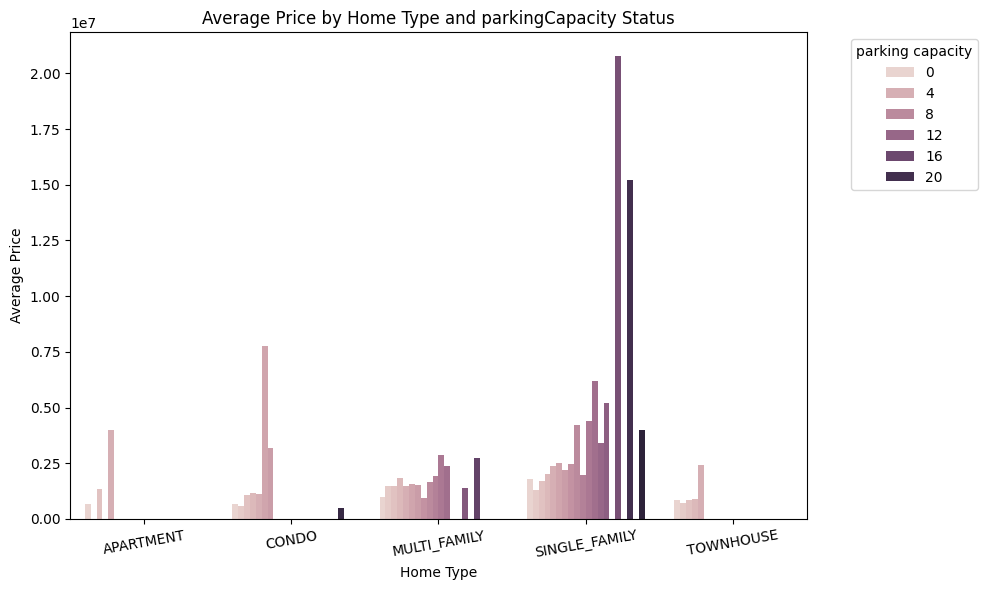

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['homeType', 'parkingCapacity'])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='homeType', y='price', hue='parkingCapacity', data=grouped_data)
plt.title('Average Price by Home Type and parkingCapacity Status')
plt.xlabel('Home Type')
plt.ylabel('Average Price')
plt.legend(title='parking capacity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


#### Single Family Homes:
1. **Ownership and Lifestyle**:
   - Single-family homeowners often have multiple vehicles and prioritize properties with adequate parking space, including garages and driveways. The availability of parking directly impacts convenience and accessibility, contributing to higher demand and prices.

2. **Property Value**:
   - Homes with ample parking capacity are perceived as more valuable, as they offer flexibility and convenience for homeowners and their guests. The ability to accommodate vehicles securely enhances the overall appeal of the property.

#### Condos and Multifamily Homes:
1. **Urban Living**:
   - Parking availability is crucial for residents of condos and multifamily homes, especially in urban areas with limited street parking. Many buyers prioritize properties with dedicated parking spaces or access to parking facilities, influencing their purchasing decisions and property prices.

2. **Market Demand**:
   - The demand for parking among condo and multifamily residents contributes to its impact on property prices. Developers often factor in parking capacity when designing and pricing residential units to meet market expectations and maximize profitability.

#### Townhouses and Apartments:
1. **Alternative Transportation**:
   - Residents of townhouses and apartments may rely less on personal vehicles, especially in urban areas with access to public transportation and amenities within walking distance. As a result, parking capacity may not be as critical a factor in determining property prices for these types of homes.

2. **Shared Parking Facilities**:
   - Townhouse and apartment communities often provide shared parking facilities or assigned parking spaces, which may mitigate the need for individual parking capacity. Buyers may prioritize other factors such as location, amenities, and unit size over parking availability when considering these properties.


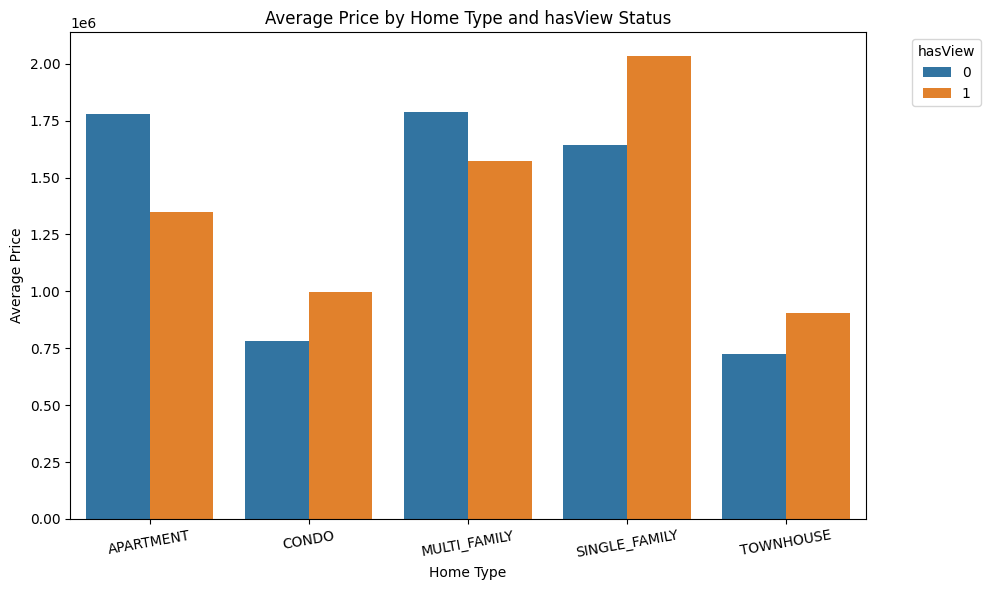

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
grouped_data = df.groupby(['homeType', 'hasView'])['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='homeType', y='price', hue='hasView', data=grouped_data)
plt.title('Average Price by Home Type and hasView Status')
plt.xlabel('Home Type')
plt.ylabel('Average Price')
plt.legend(title='hasView', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()



#### Single Family Homes:
1. **Desirability and Exclusivity**:
   - Single-family homes with a view often offer unique and exclusive landscapes, making them highly desirable. Buyers are often willing to pay a premium for scenic views that provide a sense of privacy and tranquility.

2. **Larger Property Size**:
   - Single-family homes typically have larger lots and more space, allowing for better utilization of the view. The potential for outdoor amenities such as decks, gardens, and pools also adds value.

3. **Lifestyle and Prestige**:
   - Owning a single-family home with a view is often associated with a luxurious lifestyle and higher social status. The added prestige can justify a higher price.

#### Condos:
1. **Limited Impact of Views**:
   - Condos often have shared amenities and common areas. The impact of a view is less pronounced as individual units might not have exclusive access to scenic views.

2. **Urban Settings**:
   - Condos are frequently located in urban areas where views might be obstructed by other buildings. In such settings, proximity to amenities and conveniences can be more critical factors influencing price.

3. **Market Segment**:
   - The buyer segment for condos might prioritize affordability and location over views. These buyers may prefer lower costs over premium features like views.

#### Townhouses and Apartments:
1. **Moderate Impact of Views**:
   - Views in townhouses and apartments add a moderate value because these homes often have multiple levels, and the view can be enjoyed from higher floors. However, the shared walls and closer proximity to neighbors reduce the exclusivity of the view.

2. **Urban and Suburban Settings**:
   - Townhouses and apartments are commonly found in both urban and suburban settings. In urban areas, views might be less impactful due to obstructions, while in suburban settings, they can add some value but not as much as in single-family homes.

3. **Buyer Preferences**:
   - Buyers of townhouses and apartments might value views to enhance their living experience but may not be willing to pay a significant premium. These buyers often prioritize factors like convenience, community amenities, and maintenance over exclusive views.


**In the second part of our analysis, we examined the impact of location (zipcode) and view status on the average prices of different home types. Specifically, we focused on zipcodes where the average price for at least one home type exceeds $2,000,000.**

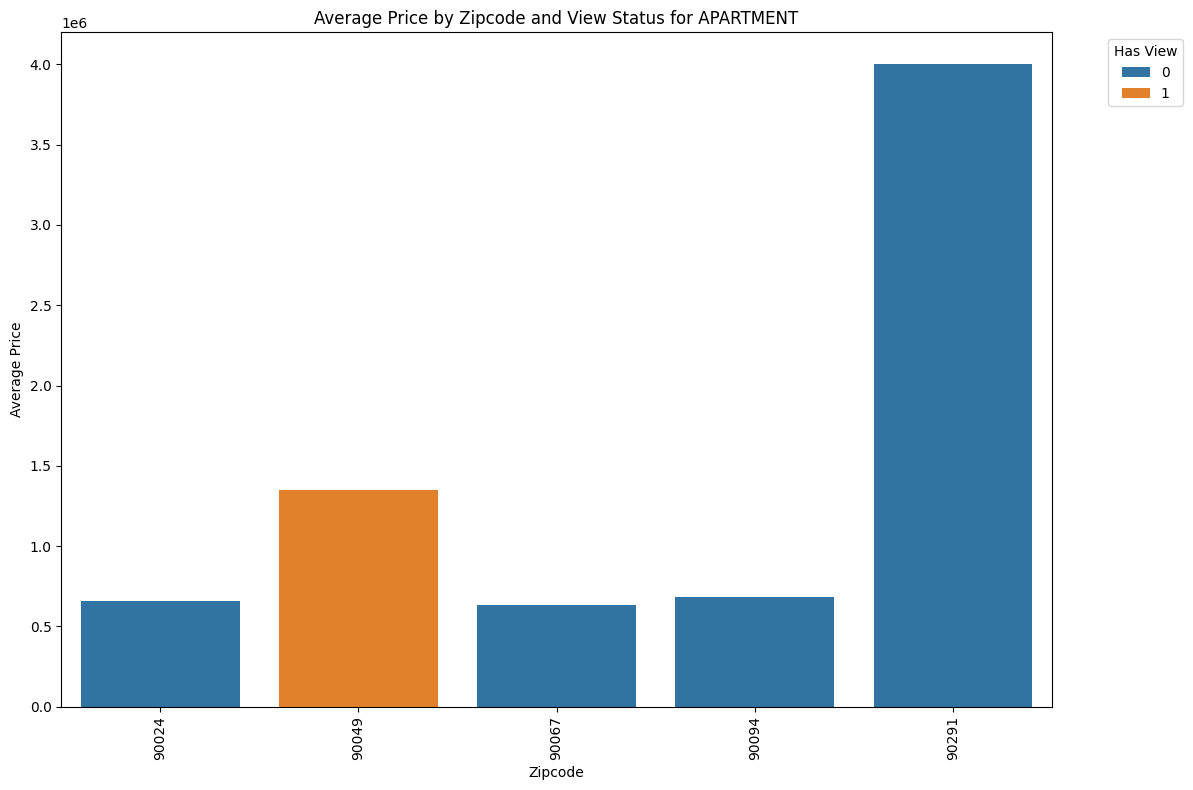

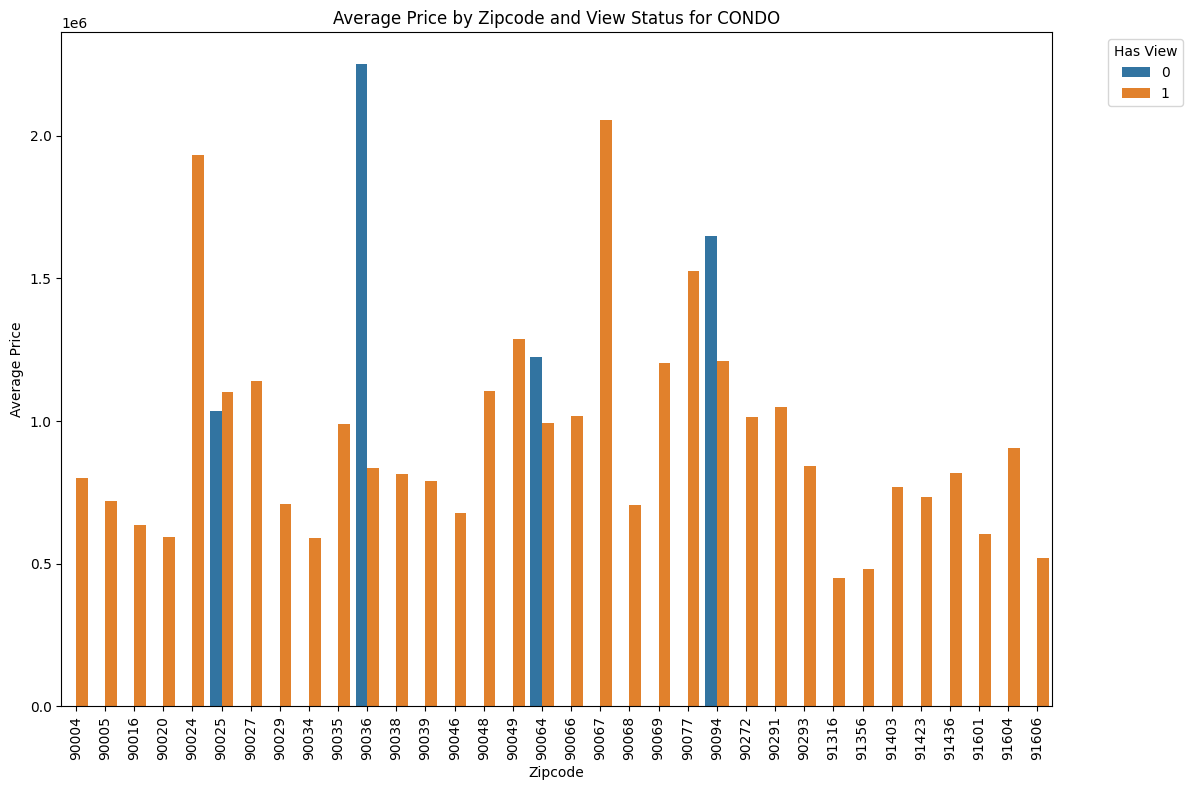

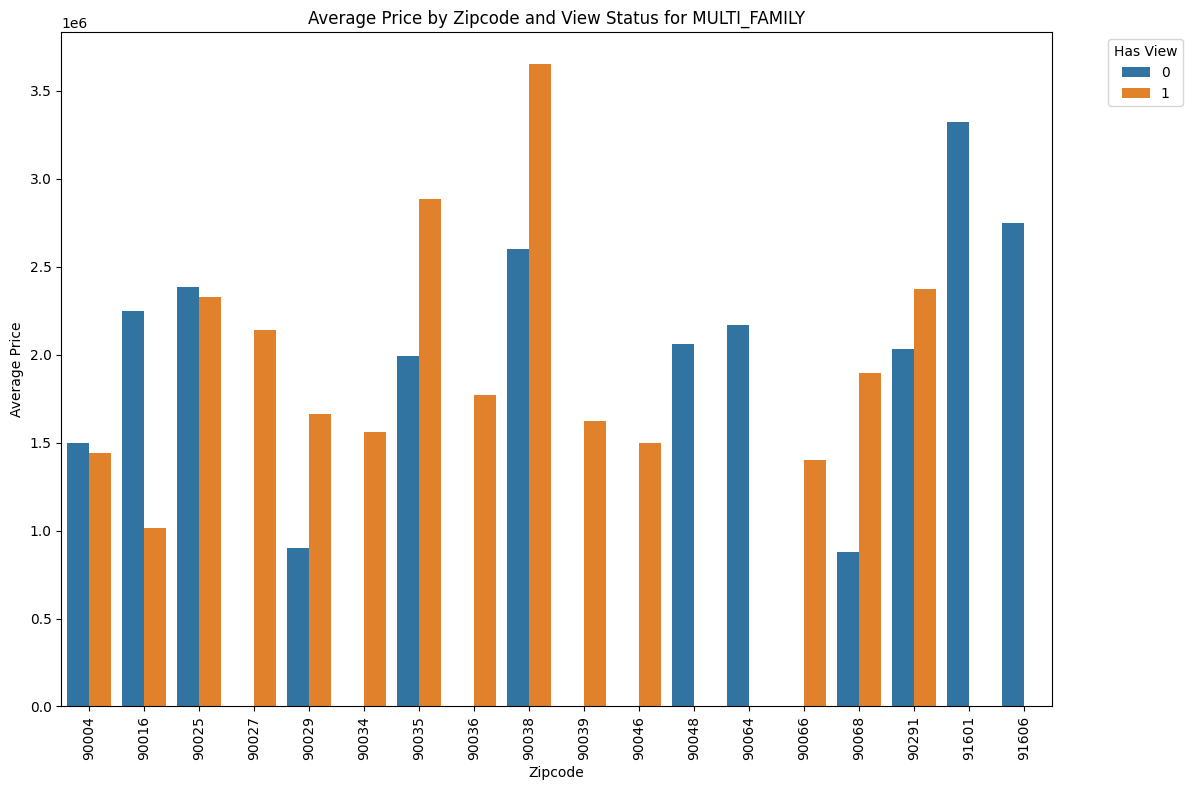

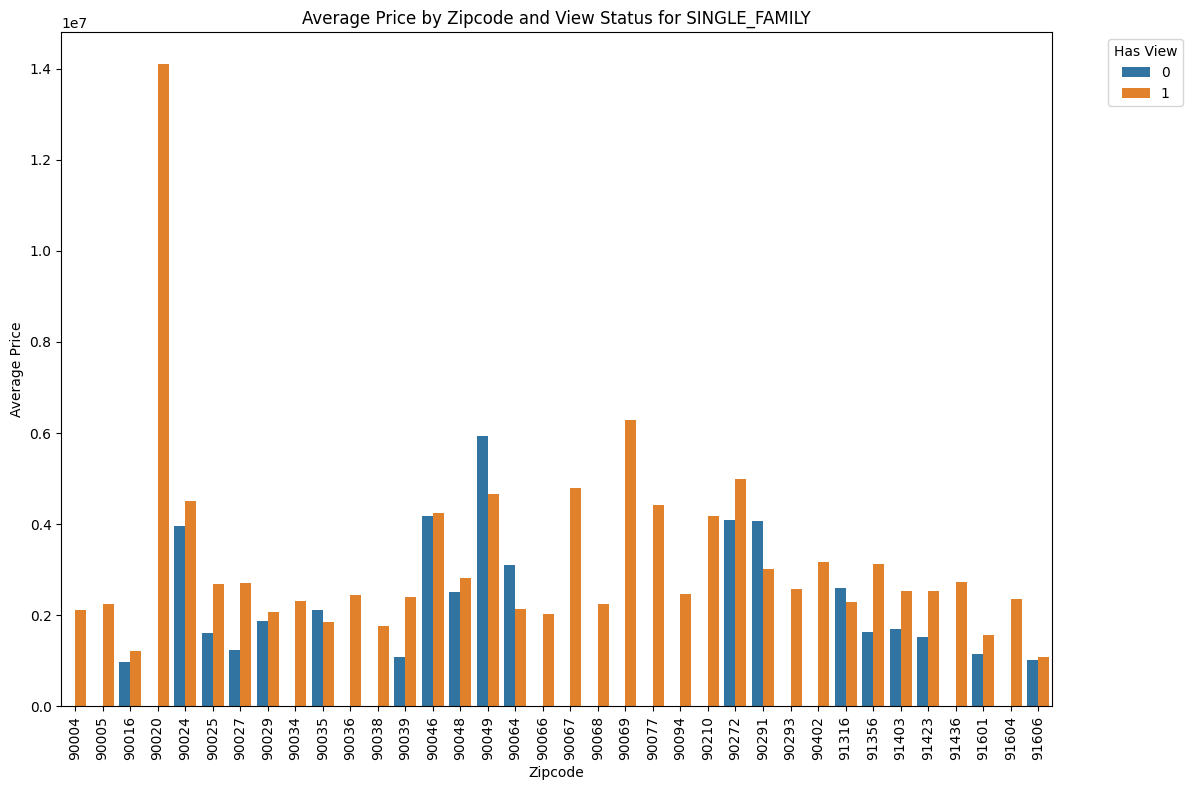

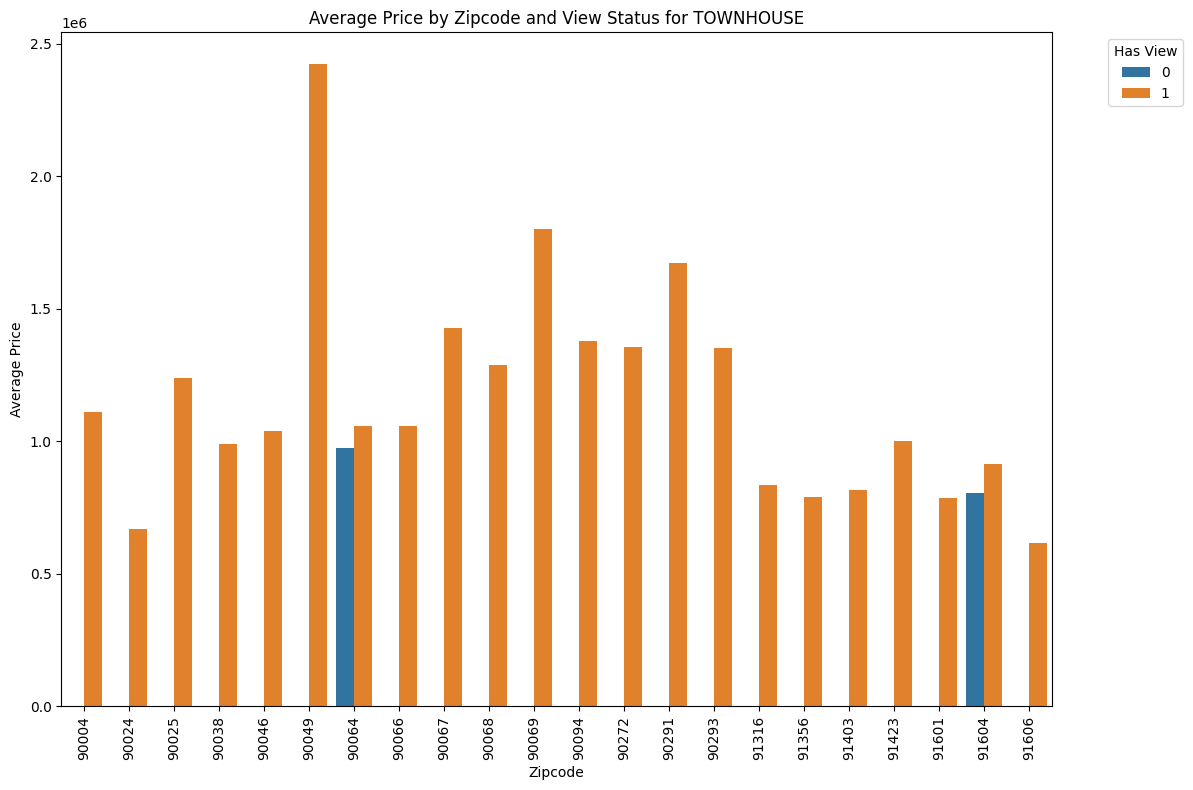

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['homeType', 'zipcode', 'hasView'])['price'].mean().reset_index()
zipcodes_above_threshold = grouped_data.groupby(['homeType', 'zipcode']).filter(
    lambda x: (x['price'] > 2000000).any()
)['zipcode'].unique()

filtered_grouped_data = grouped_data[grouped_data['zipcode'].isin(zipcodes_above_threshold)]

home_types = filtered_grouped_data['homeType'].unique()

for home_type in home_types:
    home_type_data = filtered_grouped_data[filtered_grouped_data['homeType'] == home_type]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='zipcode', y='price', hue='hasView', data=home_type_data)
    plt.title(f'Average Price by Zipcode and View Status for {home_type}')
    plt.xlabel('Zipcode')
    plt.ylabel('Average Price')
    plt.legend(title='Has View', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



The data reveals that in high-priced zipcodes, view status significantly impacts the prices of single family homes and townhouses. Single family homes with views command higher prices due to their desirability, exclusivity, and lifestyle appeal. Townhouses, often located in areas with good views, also fetch higher prices, emphasizing the importance of scenic locations. However, for condos and multifamily homes, view status does not have a significant effect on prices in these areas, as other factors such as shared amenities and overall property features play a more crucial role. This insight highlights the importance of considering property type and key value factors when assessing the impact of views on home prices in high-demand areas.

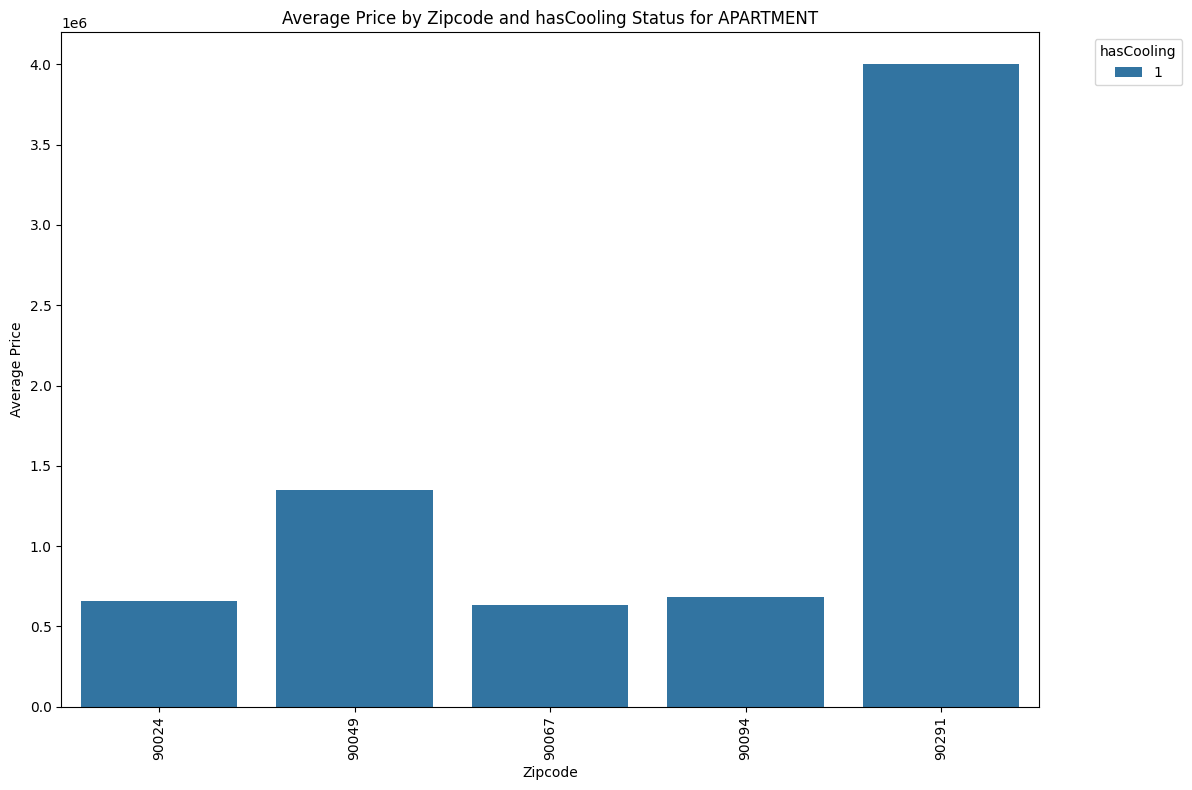

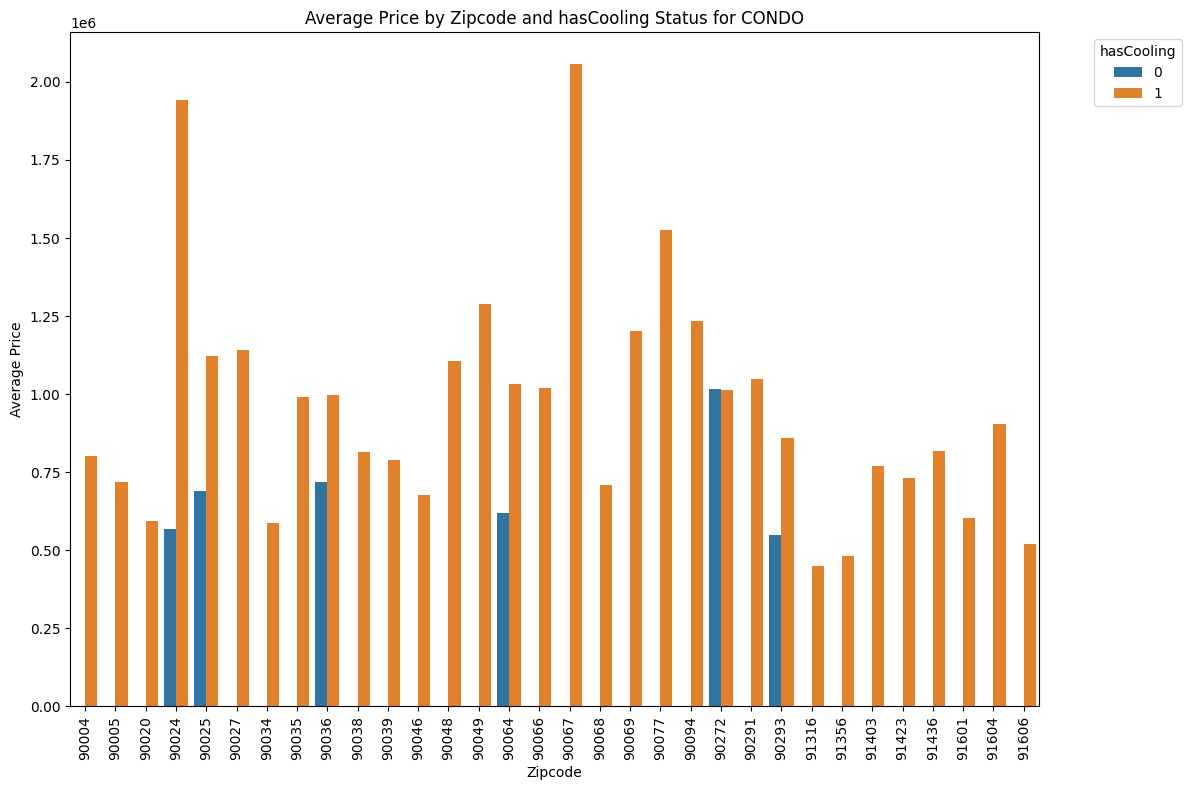

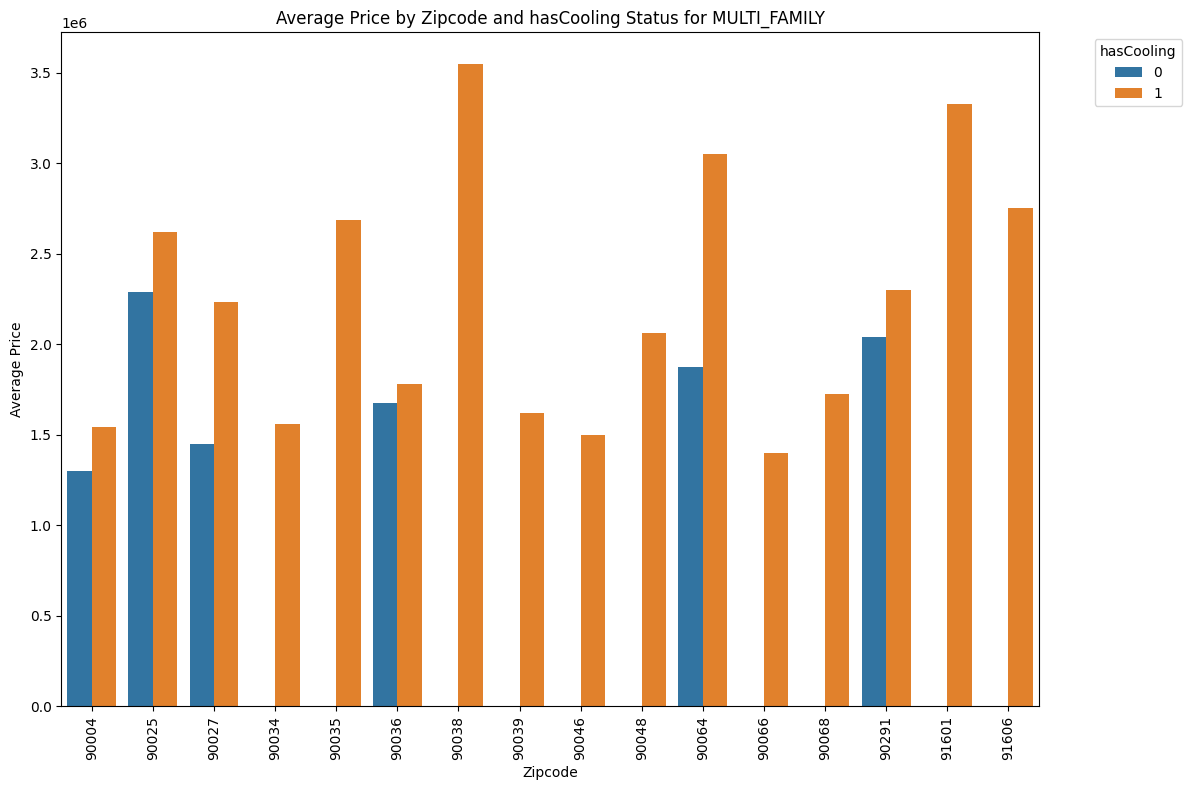

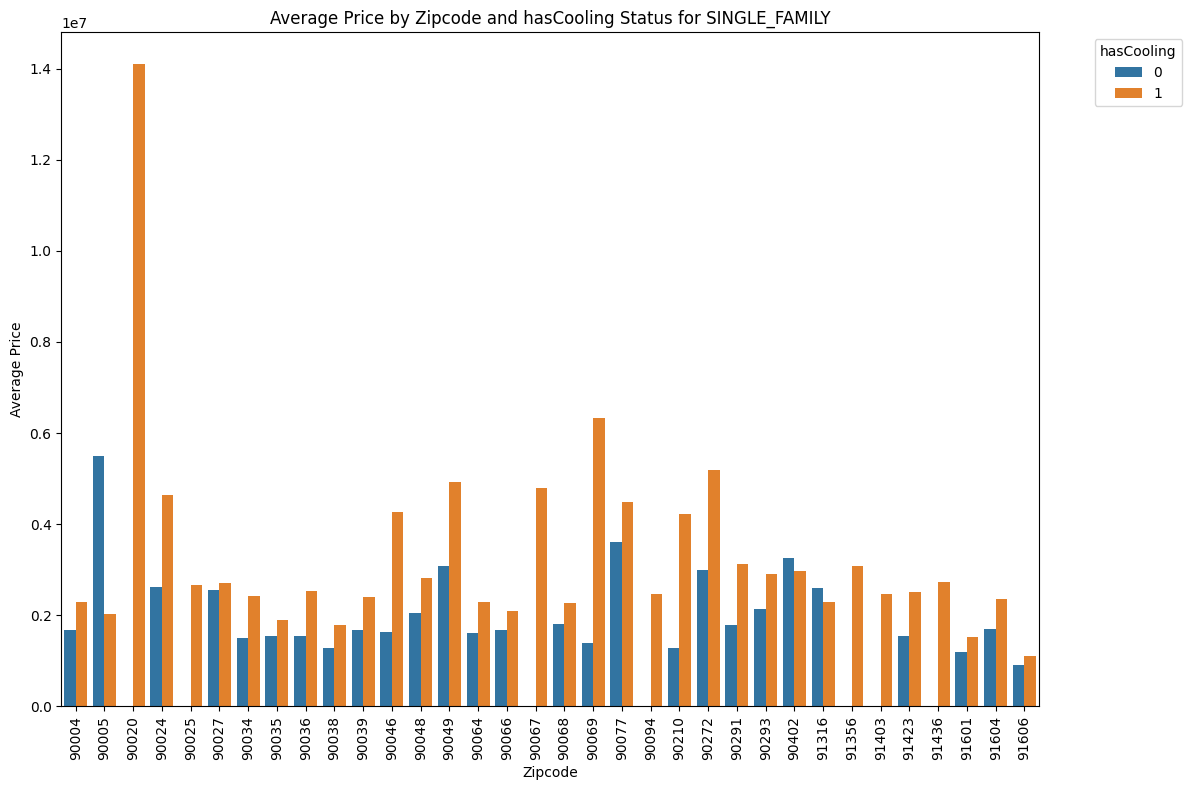

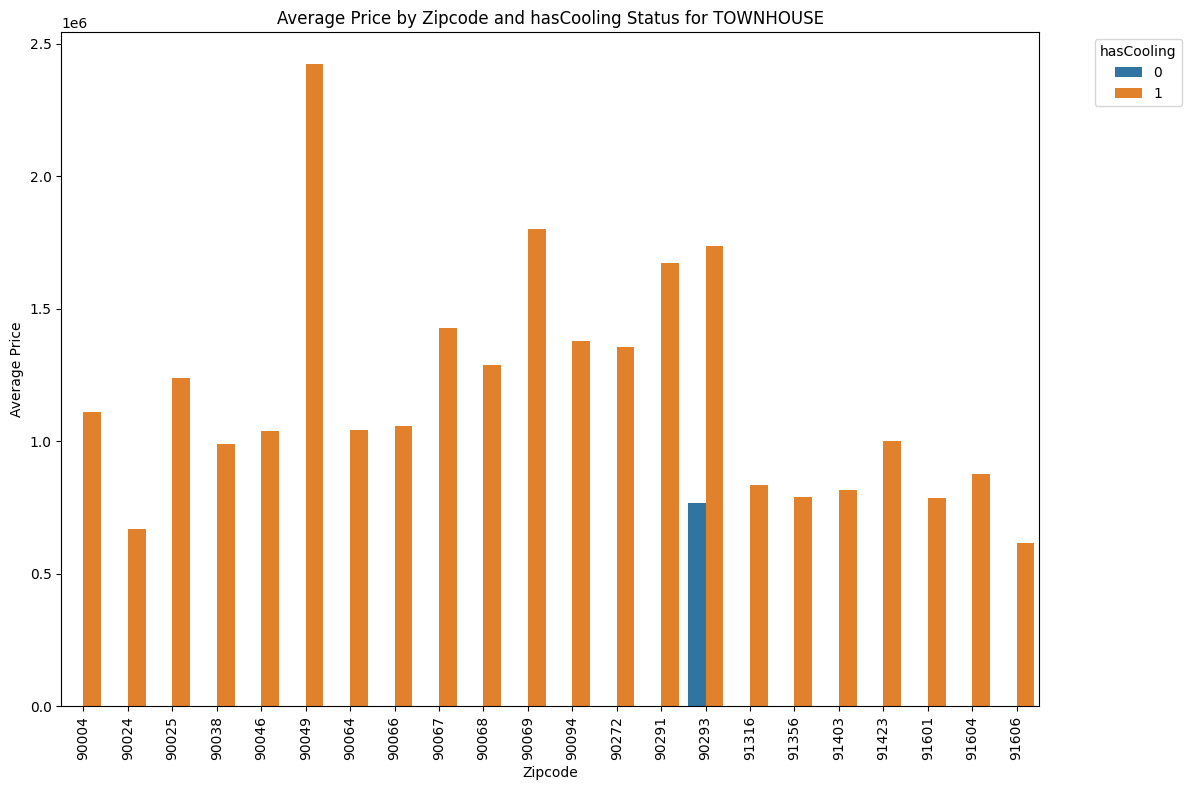

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['homeType', 'zipcode', 'hasCooling'])['price'].mean().reset_index()

zipcodes_above_threshold = grouped_data.groupby(['homeType', 'zipcode']).filter(
    lambda x: (x['price'] > 2000000).any()
)['zipcode'].unique()

filtered_grouped_data = grouped_data[grouped_data['zipcode'].isin(zipcodes_above_threshold)]
home_types = filtered_grouped_data['homeType'].unique()

for home_type in home_types:
    home_type_data = filtered_grouped_data[filtered_grouped_data['homeType'] == home_type]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='zipcode', y='price', hue='hasCooling', data=home_type_data)
    plt.title(f'Average Price by Zipcode and hasCooling Status for {home_type}')
    plt.xlabel('Zipcode')
    plt.ylabel('Average Price')
    plt.legend(title='hasCooling', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


#### Single Family Homes:
1. **Luxury**:
   - Cooling features contribute to the comfort and luxury of single family homes, particularly in warm climates. Buyers in high-priced zipcodes expect such amenities, which justify higher prices.

2. **Diverse Preferences**:
   - While cooling is important, some high-priced single family homes may be located in areas with milder climates or have alternative cooling solutions (e.g., natural ventilation), allowing for high prices even without traditional cooling systems.

#### Multifamily Homes:
1. **Attraction**:
   - Cooling is a significant factor in attracting tenants and justifying higher rents in multifamily properties. High-priced multifamily homes are likely to offer cooling to enhance living conditions.

2. **Variability **:
   - Some high-priced multifamily buildings may rely on shared or central cooling systems, which might not be reflected in individual unit listings.

#### Townhouses:
1. **Standard Expectation**:
   - In high-priced zipcodes, townhouses typically offer modern amenities, including cooling systems. Buyers in these markets expect comprehensive climate control, making cooling a standard feature in high-priced townhouses.

2. **Competitive Market**:
   - The townhouse market in high-priced areas is competitive, with developers ensuring that cooling is included to meet buyer expectations and maintain property values.

#### Condos:
1. **Shared Amenities**:
   - Condos often have central cooling systems or shared amenities that provide cooling, reducing the emphasis on individual unit cooling features in determining prices.

2. **Other Value Factors**:
   - Location, building amenities, and unit size play a more significant role in determining the prices of high-end condos, with cooling being just one of many factors considered by buyers.


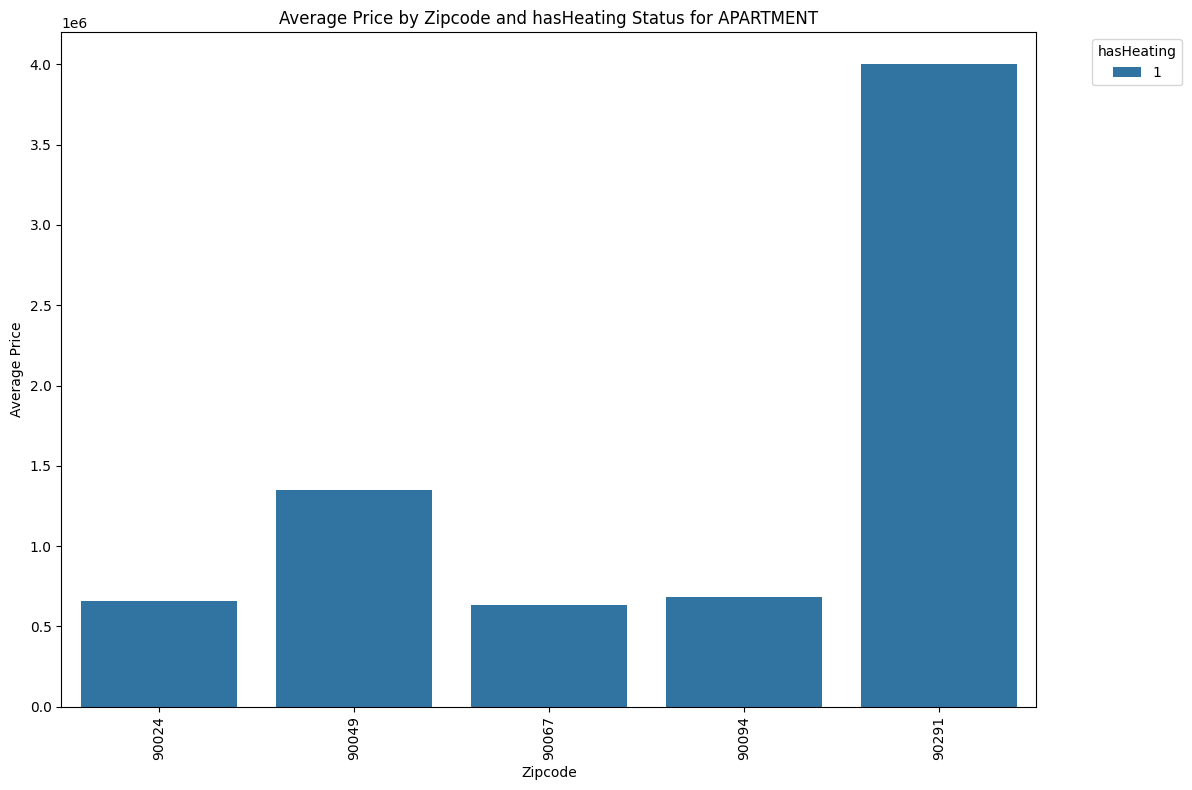

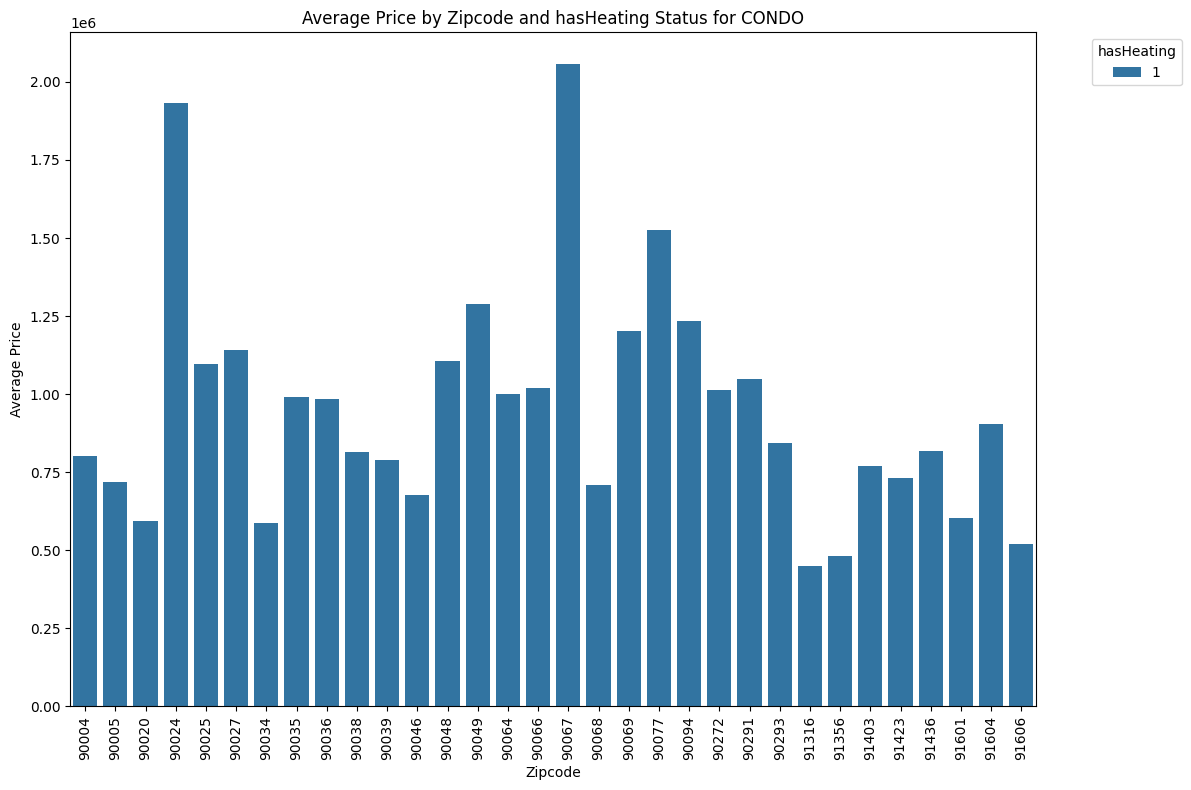

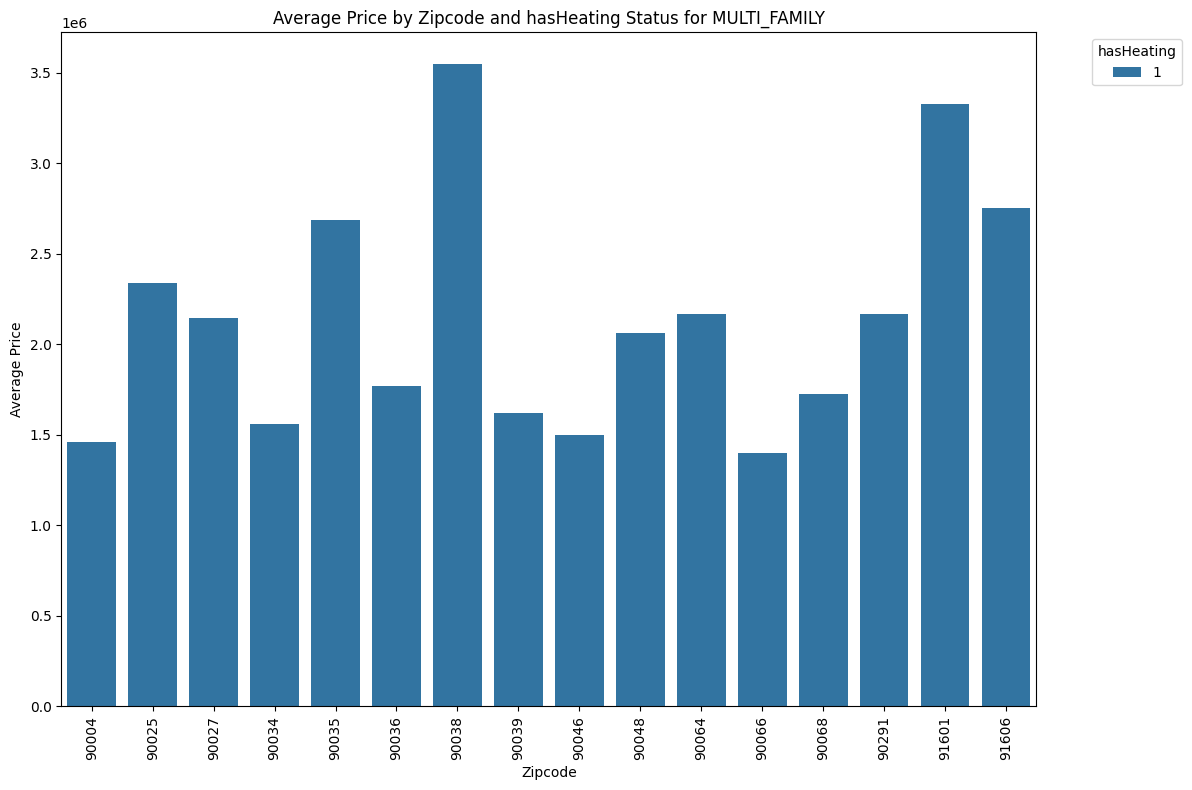

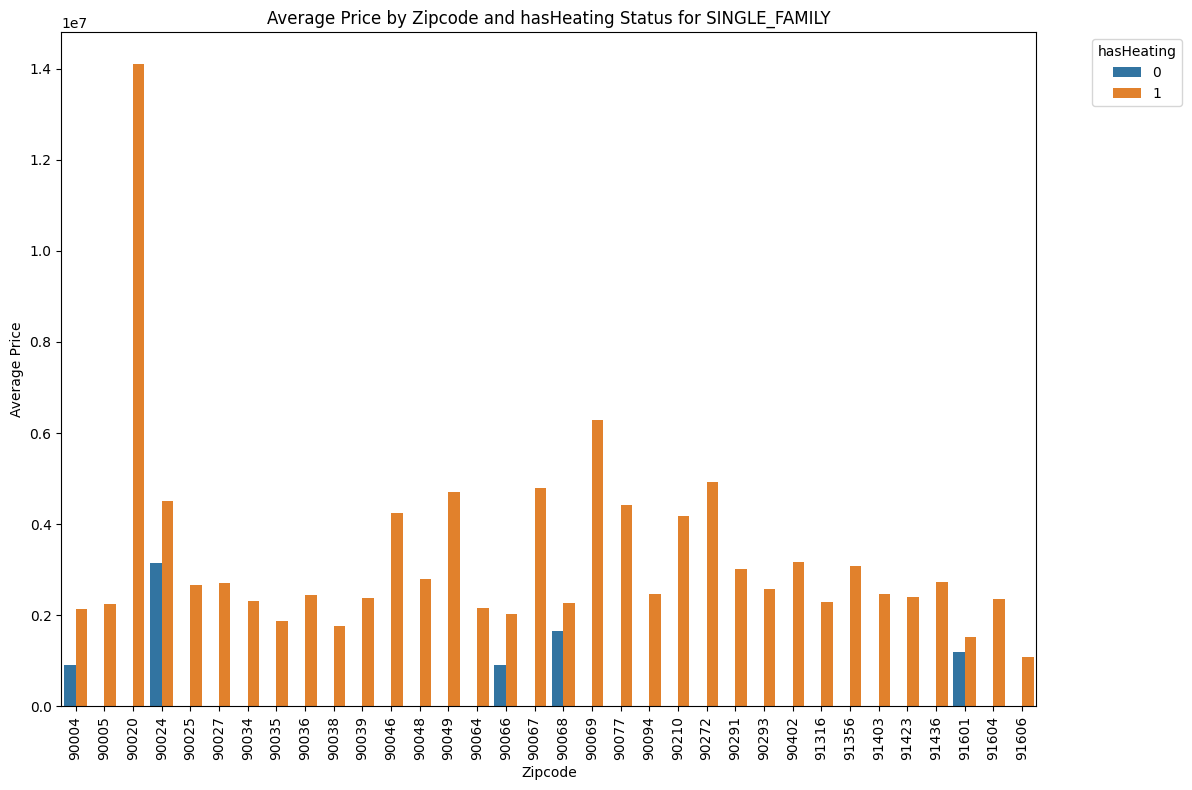

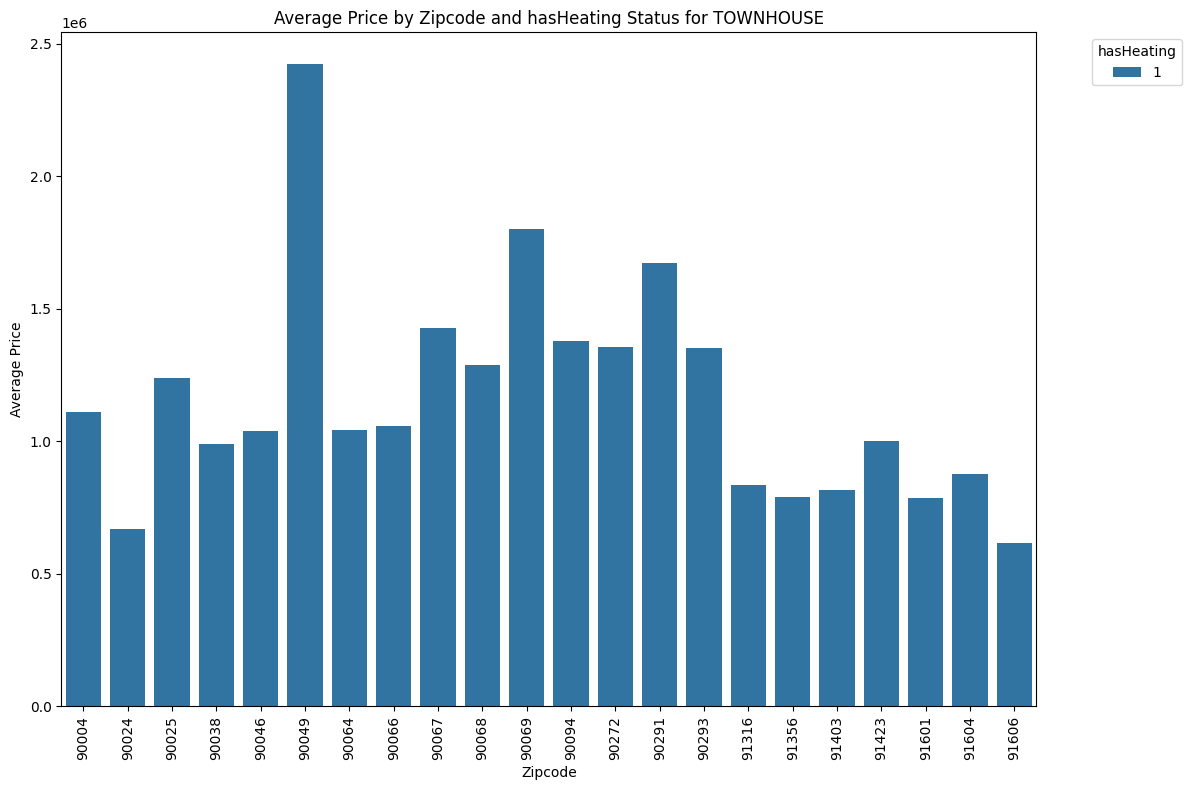

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['homeType', 'zipcode', 'hasHeating'])['price'].mean().reset_index()

zipcodes_above_threshold = grouped_data.groupby(['homeType', 'zipcode']).filter(
    lambda x: (x['price'] > 2000000).any()
)['zipcode'].unique()

filtered_grouped_data = grouped_data[grouped_data['zipcode'].isin(zipcodes_above_threshold)]
home_types = filtered_grouped_data['homeType'].unique()

for home_type in home_types:
    home_type_data = filtered_grouped_data[filtered_grouped_data['homeType'] == home_type]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='zipcode', y='price', hue='hasHeating', data=home_type_data)
    plt.title(f'Average Price by Zipcode and hasHeating Status for {home_type}')
    plt.xlabel('Zipcode')
    plt.ylabel('Average Price')
    plt.legend(title='hasHeating', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


If we sum this up in general,the data indicates that both heating and cooling features significantly impact the prices of single family and multifamily homes in high-priced zipcodes. These features are essential for comfort and are generally expected in high-value properties. For townhouses, heating and cooling are standard in high-priced properties, reflecting buyer expectations and market norms. In contrast, the presence of heating and cooling in high-priced condos is less significant, with other factors such as location and overall building amenities playing a more critical role in determining prices. 

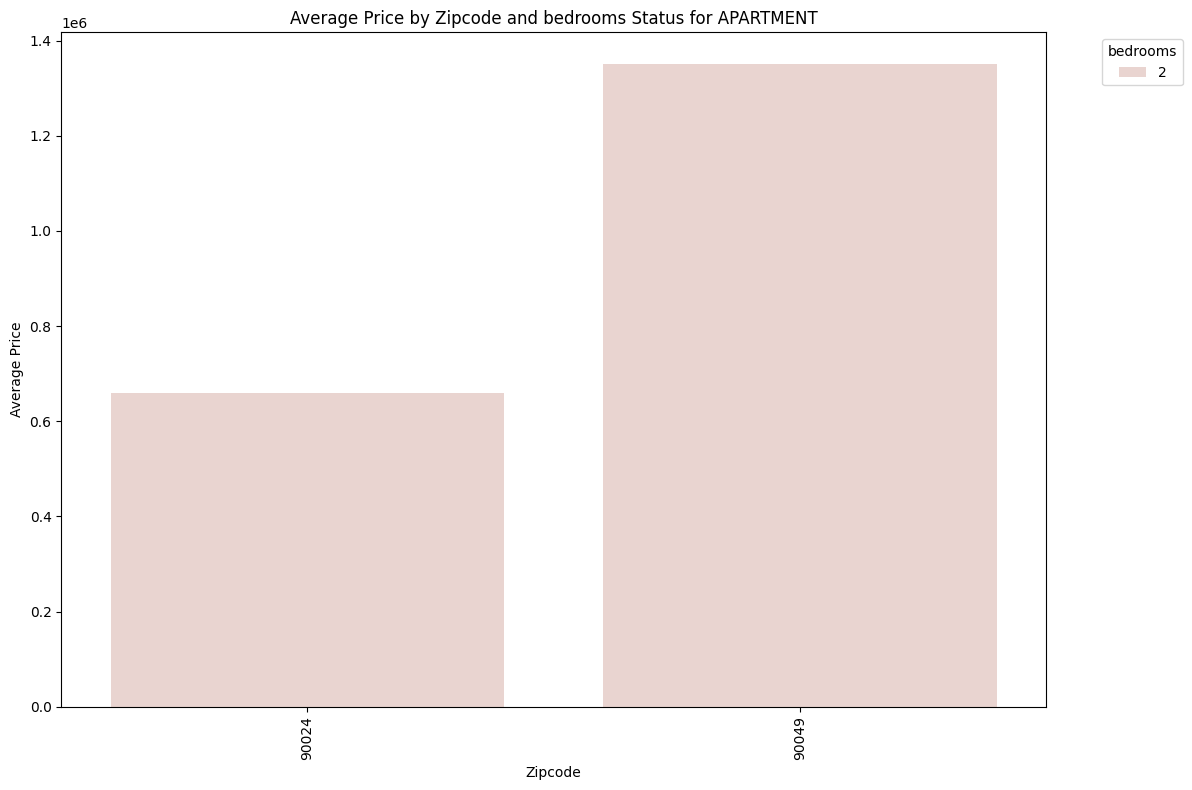

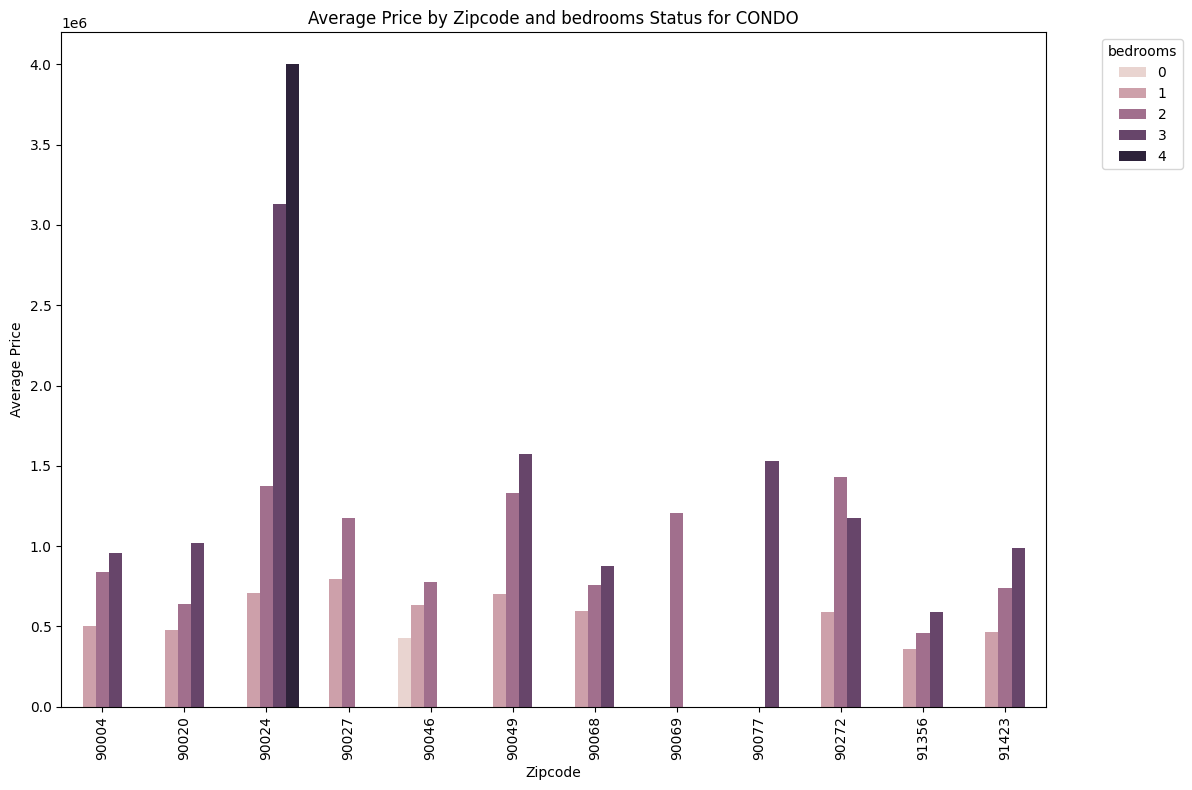

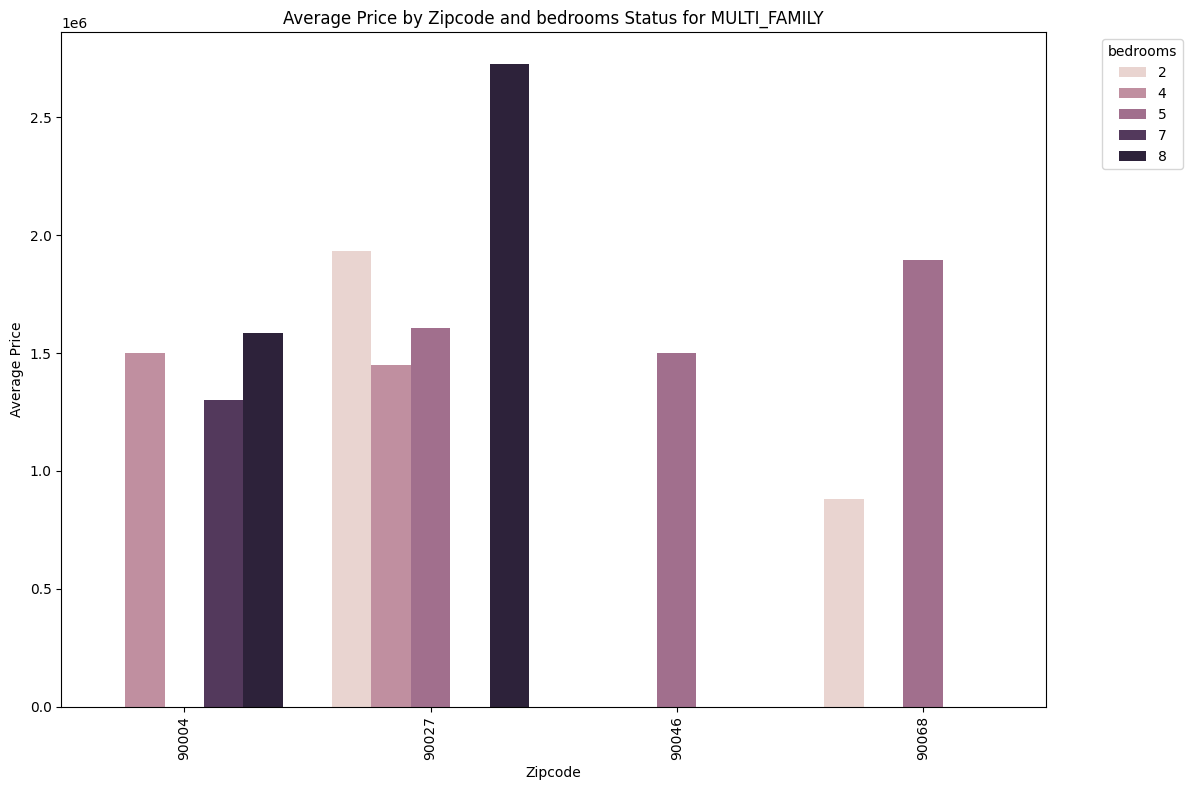

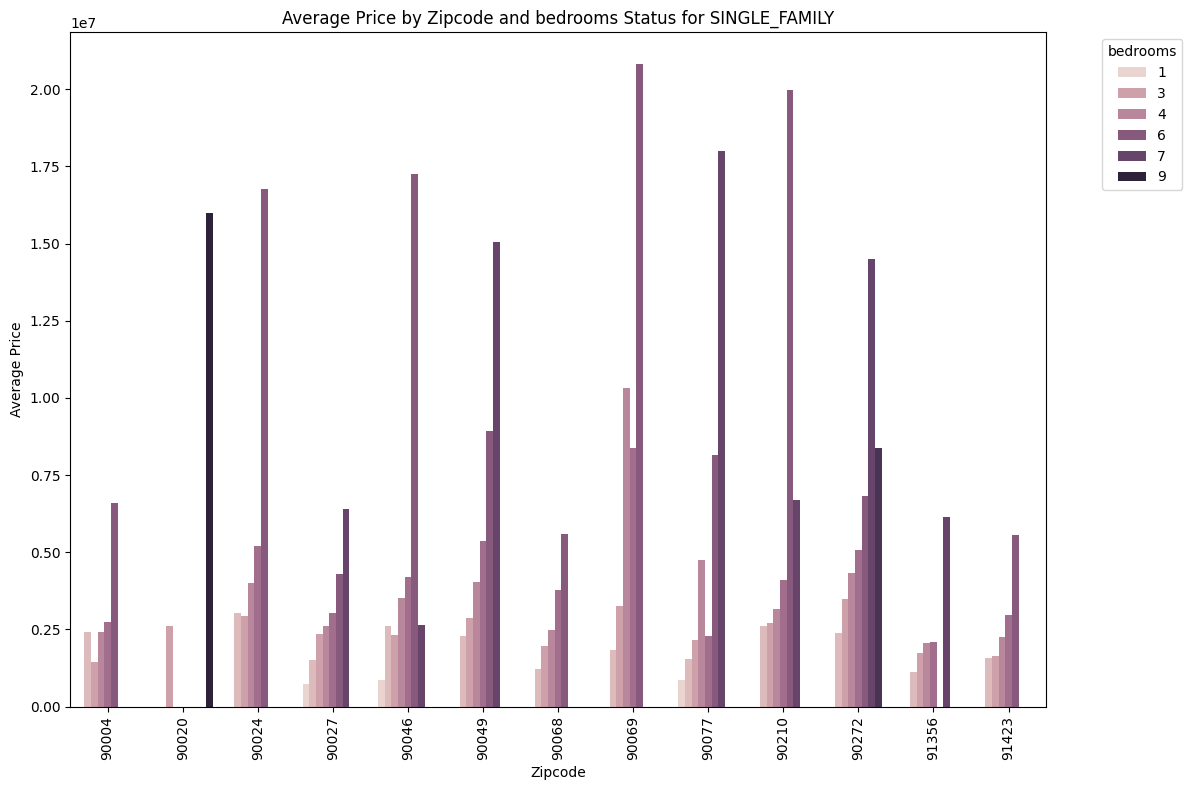

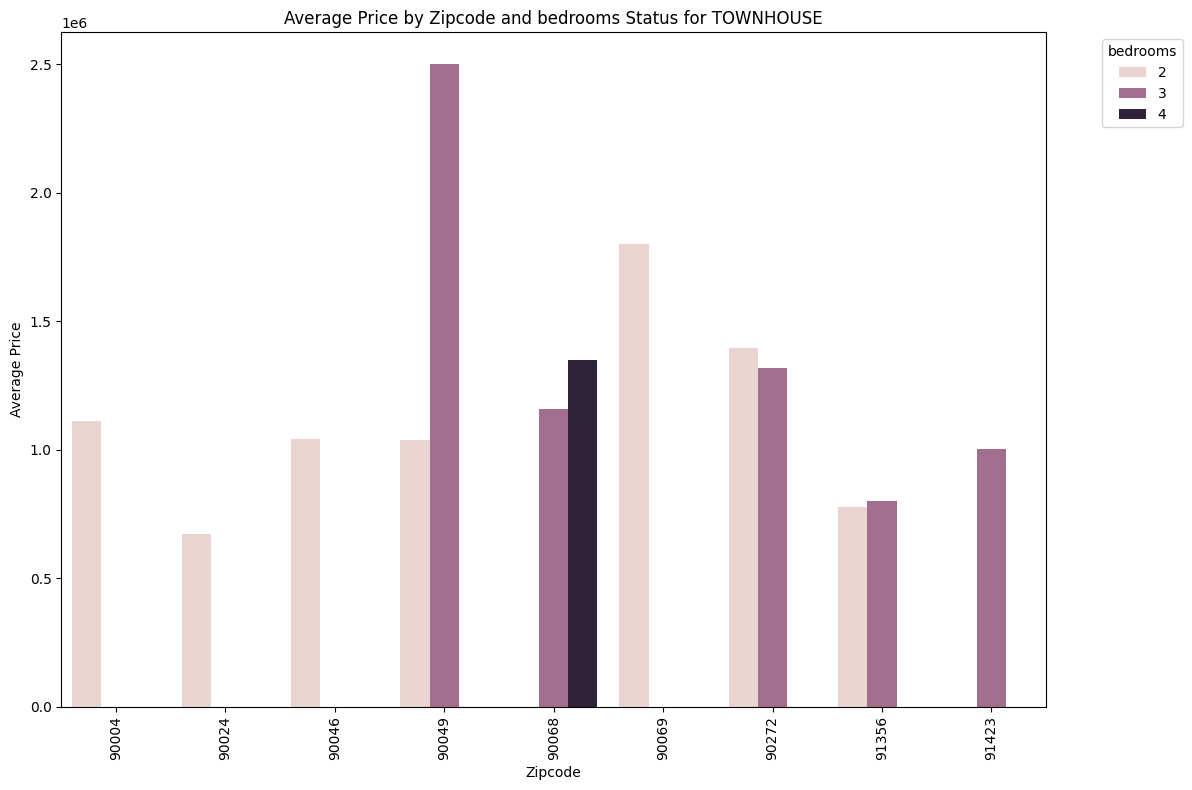

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['homeType', 'zipcode', 'bedrooms'])['price'].mean().reset_index()

zipcodes_above_threshold = grouped_data.groupby(['homeType', 'zipcode']).filter(
    lambda x: (x['price'] > 5000000).any()
)['zipcode'].unique()

filtered_grouped_data = grouped_data[grouped_data['zipcode'].isin(zipcodes_above_threshold)]
home_types = filtered_grouped_data['homeType'].unique()

for home_type in home_types:
    home_type_data = filtered_grouped_data[filtered_grouped_data['homeType'] == home_type]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='zipcode', y='price', hue='bedrooms', data=home_type_data)
    plt.title(f'Average Price by Zipcode and bedrooms Status for {home_type}')
    plt.xlabel('Zipcode')
    plt.ylabel('Average Price')
    plt.legend(title='bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


The analysis reveals a consistent trend across all home types: properties with a higher number of bedrooms generally have higher prices. This pattern holds true for single family homes, condos, townhouses, and multifamily homes.

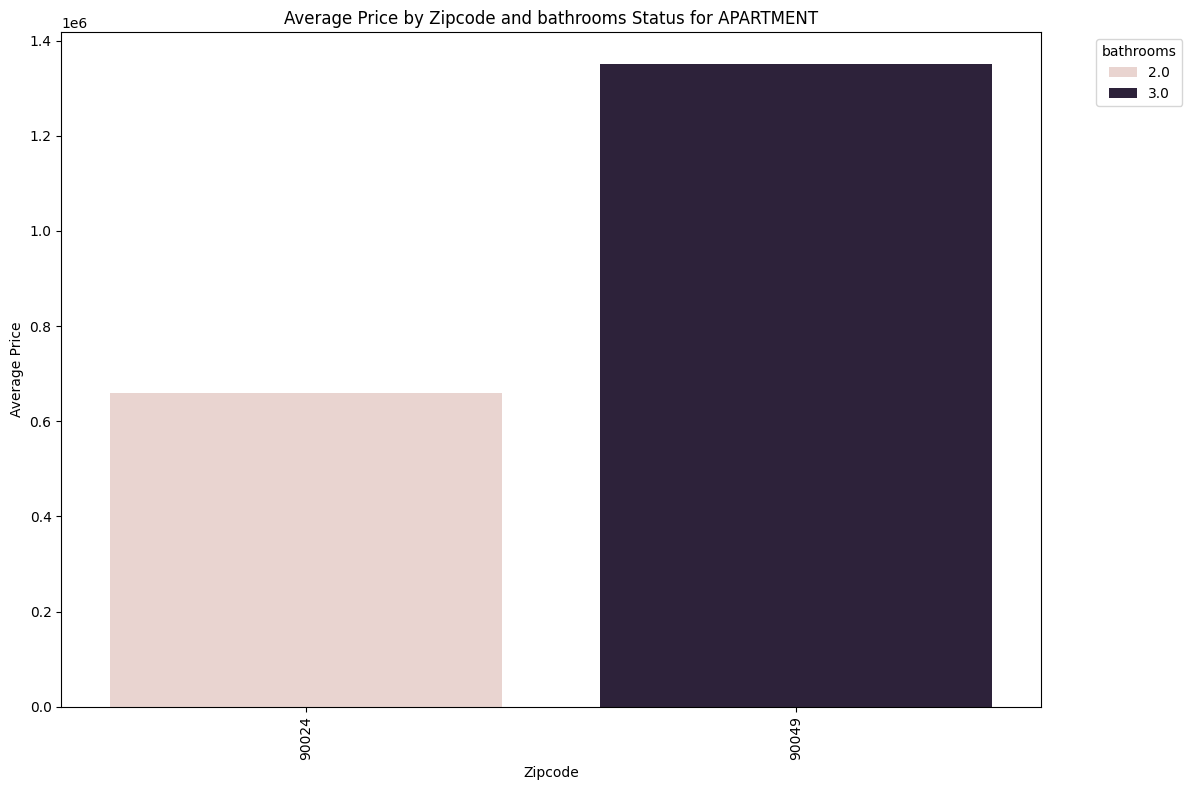

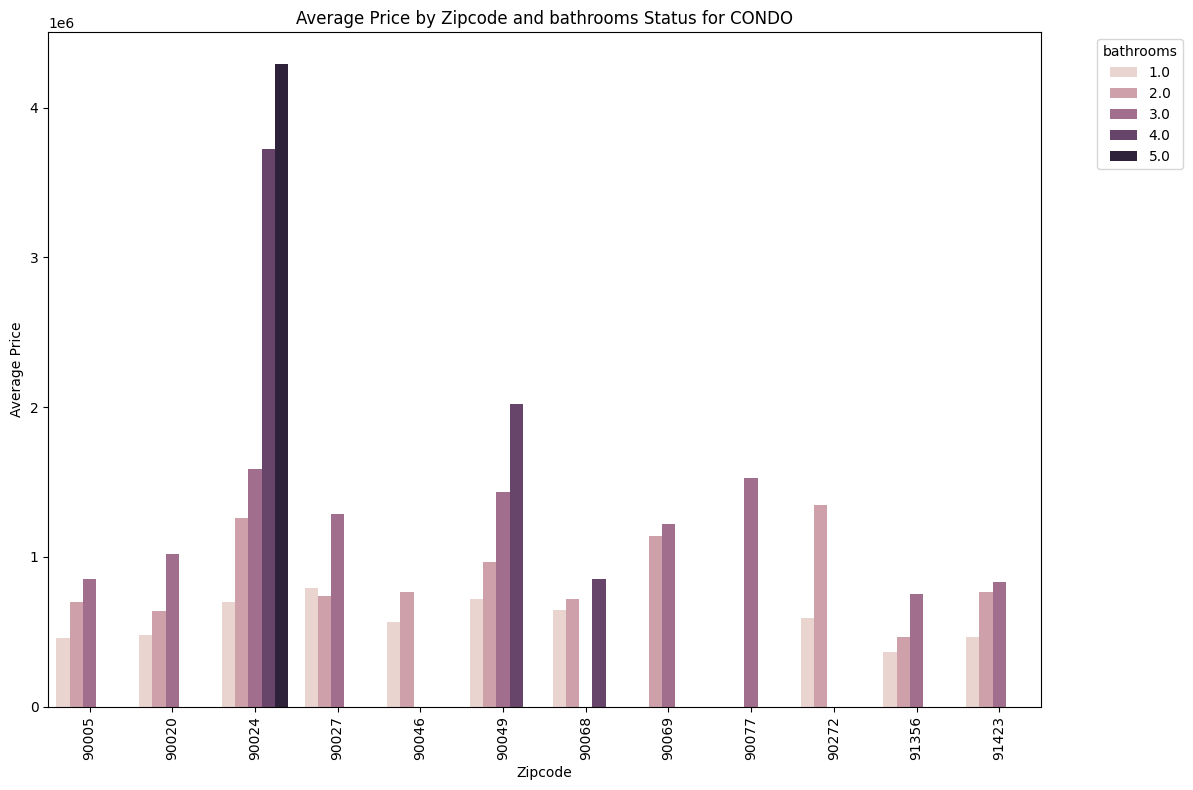

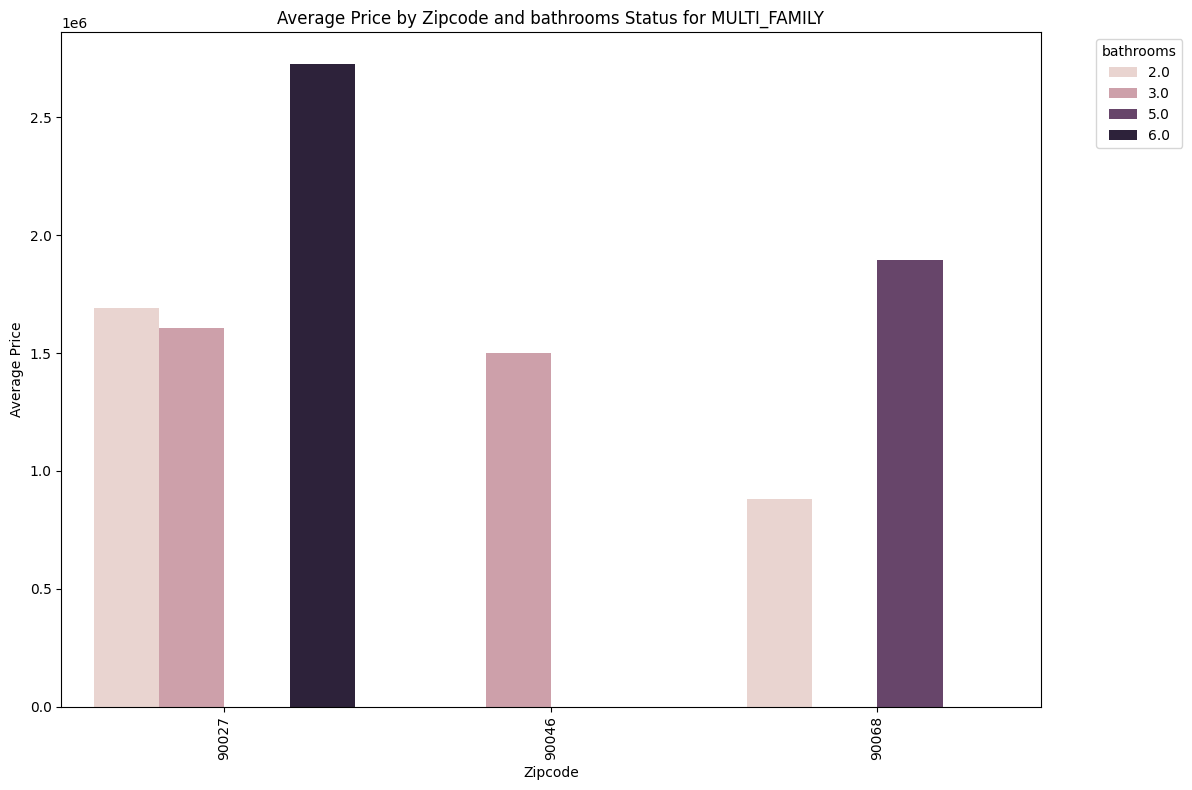

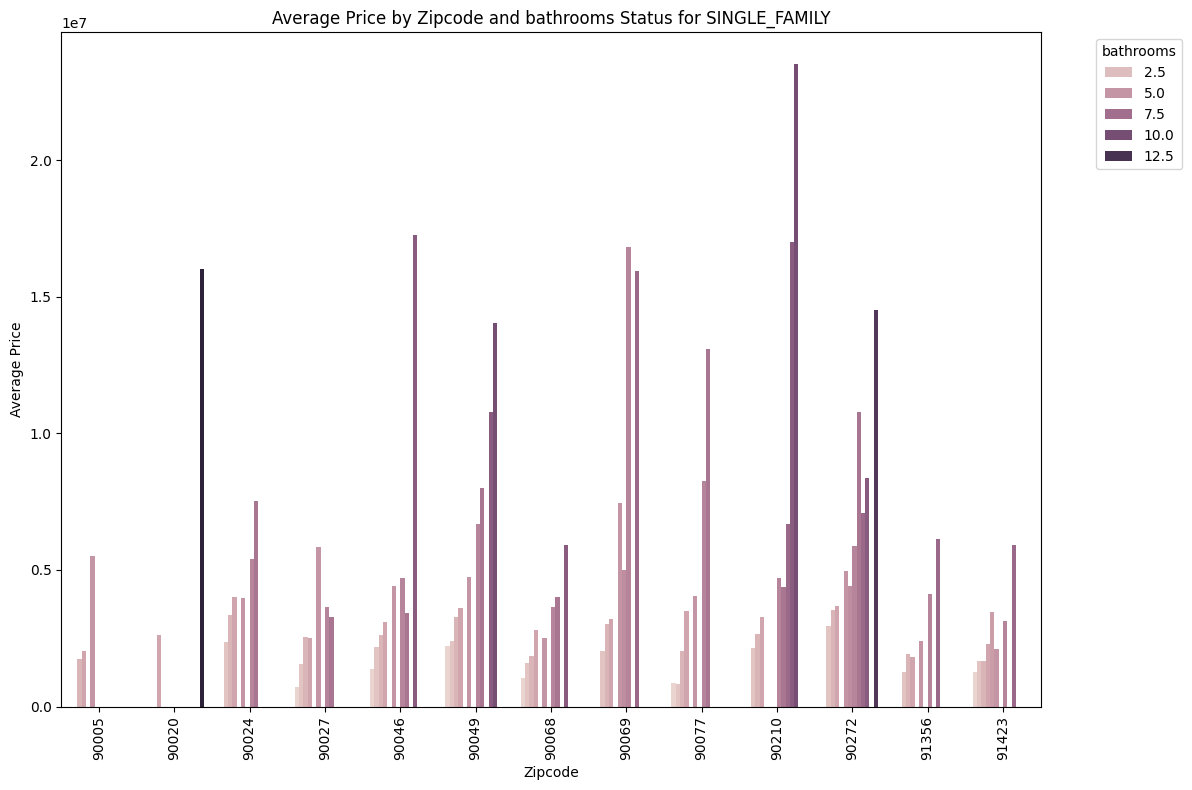

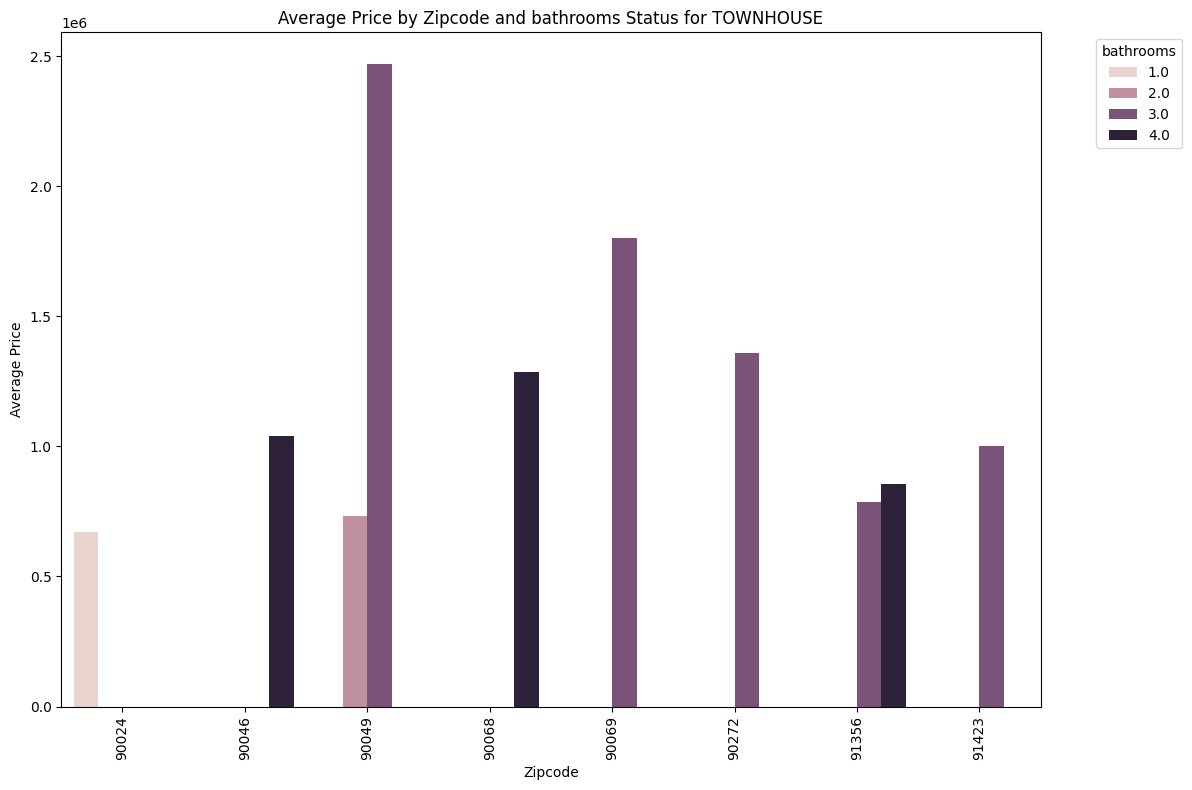

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['homeType', 'zipcode', 'bathrooms'])['price'].mean().reset_index()

zipcodes_above_threshold = grouped_data.groupby(['homeType', 'zipcode']).filter(
    lambda x: (x['price'] > 5000000).any()
)['zipcode'].unique()

filtered_grouped_data = grouped_data[grouped_data['zipcode'].isin(zipcodes_above_threshold)]
home_types = filtered_grouped_data['homeType'].unique()

for home_type in home_types:
    home_type_data = filtered_grouped_data[filtered_grouped_data['homeType'] == home_type]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='zipcode', y='price', hue='bathrooms', data=home_type_data)
    plt.title(f'Average Price by Zipcode and bathrooms Status for {home_type}')
    plt.xlabel('Zipcode')
    plt.ylabel('Average Price')
    plt.legend(title='bathrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

**SALE HISTORY**

In [152]:
import pandas as pd
import ast
def parse_sold_history(history):
    try:
        history_list = ast.literal_eval(history)
        return [(date, price) for date, price in history_list if isinstance(date, str) and isinstance(price, (int, float))]
    except:
        return []
df['sold-history'] = df['sold-history'].apply(parse_sold_history)
def calculate_growth_rate(history):
    growth_rates = []
    for i in range(len(history) - 1):
        date1, price1 = history[i]
        date2, price2 = history[i + 1]
        years_difference = int(date2[:4]) - int(date1[:4])
        if years_difference != 0 and price1 != 0:
            growth_rate = ((price2 - price1) / price1) / years_difference
            growth_rates.append(growth_rate)
    return sum(growth_rates) / len(growth_rates) if growth_rates else 0

filtered_df = df[df['sold-history'].astype(bool)].copy()
filtered_df['growth_rate'] = filtered_df['sold-history'].apply(calculate_growth_rate)
average_growth_by_zipcode = filtered_df.groupby('zipcode')['growth_rate'].mean()

print(average_growth_by_zipcode)


zipcode
90001    0.023273
90002   -0.022261
90003   -0.380951
90004    0.023464
90005   -0.351771
           ...   
91602   -0.848414
91604   -1.282510
91605    0.089674
91606    0.024860
91607    0.008524
Name: growth_rate, Length: 109, dtype: float64


In [153]:
sorted_growth_rate = average_growth_by_zipcode.sort_values(ascending=False)
print(sorted_growth_rate)


zipcode
90047     0.172034
90065     0.158968
90062     0.126168
90037     0.096886
90064     0.093413
           ...    
90017    -3.617703
91601    -4.139532
90028    -5.974681
90013    -7.372272
90015   -13.803312
Name: growth_rate, Length: 109, dtype: float64


**TOP TEN HIGHEST GROWTH RATE**

In [154]:
print(sorted_growth_rate.head(10))

zipcode
90047    0.172034
90065    0.158968
90062    0.126168
90037    0.096886
90064    0.093413
90230    0.093221
91605    0.089674
90008    0.085783
90061    0.080442
90011    0.076536
Name: growth_rate, dtype: float64


In [156]:
print(sorted_growth_rate.tail(10))

zipcode
90019    -1.020973
90501    -1.255977
90067    -1.265953
91604    -1.282510
90272    -1.730388
90017    -3.617703
91601    -4.139532
90028    -5.974681
90013    -7.372272
90015   -13.803312
Name: growth_rate, dtype: float64


# A brief exploration into these neighborhoods🚀✨

HIGHEST GROWTH RATE


1. **90047**: South Los Angeles
2. **90065**: Glassell Park, Cypress Park, and Mount Washington
3. **90062**: South Los Angeles
4. **90037**: South Los Angeles (near USC)
5. **90064**: Rancho Park, West Los Angeles
6. **90230**: Culver City
7. **91605**: North Hollywood
8. **90008**: Baldwin Hills, Leimert Park
9. **90061**: South Los Angeles (Watts area)
10. **90011**: South Los Angeles (near Central-Alameda)



1. **Urban Development and Revitalization Projects**:
   - **90047 (South Los Angeles)** and **90062 (South Los Angeles)**: These areas have seen various revitalization efforts, including new housing developments and community projects aimed at improving the quality of life.
   - **90037 (South Los Angeles near USC)**: Proximity to USC has led to increased demand for housing from students and faculty, driving up property values.

2. **Improving Infrastructure and Accessibility**:
   - **90064 (Rancho Park, West Los Angeles)**: This area has seen improvements in public transportation, including the expansion of the Metro Expo Line, making it more accessible and attractive to commuters.
   - **90230 (Culver City)**: Culver City has undergone significant redevelopment, including the revitalization of its downtown area, making it a desirable location for both residential and commercial real estate.

3. **Proximity to Employment Hubs and Amenities**:
   - **91605 (North Hollywood)**: North Hollywood is part of the NoHo Arts District, which is known for its cultural attractions, theaters, and growing entertainment industry presence, making it appealing to young professionals.
   - **90011 (South Los Angeles near Central-Alameda)**: This area is seeing gradual improvements in amenities and services, attracting new residents.

4. **Community and Cultural Attractions**:
   - **90008 (Baldwin Hills, Leimert Park)**: Known for its cultural significance and community events, this area is popular among those seeking a vibrant neighborhood with rich history.
   - **90065 (Glassell Park, Cypress Park, and Mount Washington)**: These neighborhoods offer scenic views, parks, and a sense of community, attracting families and young professionals.

5. **Affordable Housing Relative to Other Parts of LA**:
   - **90061 (South Los Angeles - Watts area)**: Despite its historical challenges, the Watts area has become more attractive due to relatively affordable housing prices compared to other parts of Los Angeles.
   - **90047 (South Los Angeles)**: Similar to Watts, South Los Angeles offers more affordable housing options, which can attract new residents looking for lower-cost living spaces.


LOWEST GROWTH RATE


1. **90019**: Mid-City
2. **90501**: Torrance
3. **90067**: Century City
4. **91604**: Studio City
5. **90272**: Pacific Palisades
6. **90017**: Downtown Los Angeles (Historic Core)
7. **91601**: North Hollywood (Arts District)
8. **90028**: Hollywood
9. **90013**: Downtown Los Angeles (Fashion District)
10. **90015**: Downtown Los Angeles (South Park)



1. **90019 (Mid-City)**: Established neighborhood with limited space for new development; higher crime rates may deter investment.
2. **90501 (Torrance)**: Stable suburban area lacking the allure of newer neighborhoods; limited inventory and stable population contribute to slower growth.
3. **90067 (Century City)**: Dominated by commercial buildings with limited residential options; high property prices and limited inventory slow growth.
4. **91604 (Studio City)**: Higher property prices and limited inventory compared to neighboring areas; competition and saturation may contribute to slower growth.
5. **90272 (Pacific Palisades)**: Affluent area with strict zoning regulations and limited land availability; reached saturation point in property values.
6. **90017 (Downtown LA - Historic Core)**: Challenges with homelessness and urban blight; safety concerns and lack of amenities hinder growth.
7. **91601 (North Hollywood - Arts District)**: Overcoming industrial past; concerns about crime and safety may deter investment and growth.
8. **90028 (Hollywood)**: Reputation for high crime rates and transient populations; challenges with traffic congestion and homelessness.
9. **90013 (Downtown LA - Fashion District)**: Industrial character with limited residential amenities; concerns about safety and cleanliness.
10. **90015 (Downtown LA - South Park)**: Dense urban environment lacking green space; limited residential amenities and concerns about gentrification impact growth.
